<a href="https://colab.research.google.com/github/RodrigoLarroca/PortFolio/blob/main/Prediccion_Cervezas_Larroca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS Y PREDICCION EN INGREDIENTES Y OPINION DE CERVEZAS**



Integrantes: Larroca Rodrigo


**CONTEXTO COMERCIAL:** 

Trabaja en una consultora privada de datos, donde un cliente del rubro de cervezas requiere sus servicios para encontrar el **optimo gusto** en su nuevo proyecto de cerveza. El mercado actual presenta mucha demanda debido a las fechas festivas, por lo cual es imperante para el cliente obtener resultados en un tiempo determinado. Es función del equipo determinar qué gustos/aromas/estilo de cerveza es el de mas gustado y por ende el posible mas consumido.

**PROBLEMA COMERCIAL:** 

Se espera mejorar la eleccion de ingredientes en base a opiniones de personas.
¿Existen patrones particulares en los ingredientes de las cervezas que puedan ser indicativos de opioniones excelentes?

**CONTEXTO ANALITICO:** 




El equipo consiguio datos sobre una gran cantidad de cervezas, su composicion, sus gustos y opiones realizadas a 3200 personas. Los datos aquí no estarán etiquetados; es decir, no hay una variable que nos diga cuáles de estas opiniones son buenas o no. En su lugar, debemos utilizar modelos de agrupamiento para abordar este problema de aprendizaje no supervisado.

El caso se estructura de la siguiente manera:
 

1.   Realizar análisis de datos exploratorios para investigar visualmente la estructura de los datos.
2.   Utilizar estas observaciones para guiar nuestra metodología de agrupamiento y ajustar los modelos adecuados.
3.   Discutir las ventajas y limitaciones de los métodos de agrupamiento típicos.
4.   Segmentar y generar conclusiones sobre grupos específicos.






**HIPOTESIS:**

Utilizando un conjunto de datos que incluyen información sobre los ingredientes utilizados en diferentes cervezas, así como las opiniones de clientes sobre esas cervezas, se puede entrenar un modelo de aprendizaje automático que sea capaz de predecir qué ingredientes se utilizarán en una cerveza determinada, y cuál será la opinión del cliente sobre esa cerveza. Esto podría ayudar a los cerveceros a mejorar la calidad de sus productos ya satisfacer mejor las necesidades y gustos de sus clientes.

El conjunto de datos principal ( beer.csv) contiene las siguientes columnas:

*   Nombre : Nombre de la cerveza (etiqueta)
*   Estilo : Estilo de la cerveza
*   Cervecería : Nombre de la cervecería
*   Nombre de la cerveza (completo) : Nombre completo de la cerveza -- identificador único para cada cerveza
*   Descripción : Notas en la cerveza si está disponible
*   ABV : Contenido de alcohol de la cerveza (% por volumen)
*   Min IBU : El valor mínimo de IBU
*   Max IBU: El valor máximo de IBU

Las siguientes once columnas representan las características del perfil de degustación de la cerveza.

(Sensación en boca)
*   Astringencia
*   Cuerpo
*   Alcohol

(Sabor)
*   Amargo
*   Dulce
*   Agrio
*   Salado

(Sabor Y Aroma)
*   Frutas
*   Lúpulo
*   Especias
*   Malta

Las últimas seis columnas contienen información de reseñas
*   opinión _ aroma
*   opinión _ aspecto
*   opinión _ paladar
*   opinión _ sabor
*   opinión _ general
*   número _ de _ opiniones



# **Instalacion, librerias y conjunto de datos**

In [ ]:
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sidetable
!pip install xgboost
!pip install lazypredict


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import plotly.graph_objects as go
import plotly.express as px
import xgboost as xgb
import imblearn
import statsmodels.formula.api as sm
import statsmodels.api as sm
from collections import Counter
from lazypredict.Supervised import LazyClassifier

from imblearn.over_sampling import SMOTEN
from datetime import datetime
from pandas.api.types import is_numeric_dtype
from scipy import stats
from xgboost import XGBClassifier

from sklearn.decomposition import PCA         #transformacion PCA
from sklearn.linear_model import LogisticRegression #regresion logistica
from sklearn.linear_model import Lasso #seleccion de caracteristicas
from sklearn.tree import DecisionTreeClassifier #modelos tipo arbol de decision
from sklearn.neighbors import KNeighborsClassifier #modelos Knn
from sklearn.svm import SVC #modelos SVC
from sklearn.ensemble import RandomForestClassifier #modelos de random forest
from sklearn.model_selection import train_test_split #partir datos en conjuntos de entrenamiento y validacion
from sklearn.model_selection import KFold #partir datos en k- folds
from sklearn.model_selection import cross_val_score #evaluar algoritmos en cross validacion
from sklearn.model_selection import GridSearchCV #para la selección de características con lazo
from sklearn.model_selection import RandomizedSearchCV #para ecoger menores hiperparametros del xgboost
from sklearn.metrics import balanced_accuracy_score #manejo de metricas de desempeño
from sklearn.metrics import confusion_matrix #manejo de matrices de confusion
from sklearn.preprocessing import OneHotEncoder   #dividir una variable entre varias columnas y determinar valor verdadero o falso
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score, auc, roc_auc_score #metricas matrix
from sklearn.ensemble import RandomForestRegressor #para RFECV
from sklearn.feature_selection import SelectFromModel #
from sklearn.feature_selection import RFECV #Recurvise feature elimination with cross validation
from sklearn.decomposition import TruncatedSVD #SVD selección de características
from sklearn.pipeline import Pipeline
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.formula.api as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings

%matplotlib inline
plt.style.use('ggplot')
sns.set(style="darkgrid")

In [ ]:
beer = data = pd.read_csv('beer.csv')
pd.options.display.max_columns = None
beer.head(10)

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.30,25,50,13,32,9,47,74,33,0,33,57,8,111,3.50,3.64,3.56,3.64,3.85,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.20,25,50,12,57,18,33,55,16,0,24,35,12,84,3.80,3.85,3.90,4.02,4.03,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.00,25,50,14,37,6,42,43,11,0,10,54,4,62,3.41,3.67,3.60,3.63,3.83,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.50,25,50,13,55,31,47,101,18,1,49,40,16,119,4.15,4.03,4.15,4.21,4.01,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.20,25,50,25,51,26,44,45,9,1,11,51,20,95,3.62,3.97,3.73,3.77,3.82,96
5,Sticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,6.00,25,50,22,45,13,46,62,25,1,34,60,4,103,4.01,4.01,4.09,4.19,4.23,315
6,Okto Festival Ale,Altbier,Widmer Brothers Brewing Company,Widmer Brothers Brewing Company Okto,Notes:Classified as a German Altbier by the Wi...,5.30,25,50,28,40,3,40,58,29,0,36,54,8,97,3.32,3.64,3.37,3.35,3.48,124
7,Southampton Altbier,Altbier,Southampton Publick House,Southampton Publick House Southampton Altbier,Notes:,5.00,25,50,18,49,5,37,73,22,0,21,37,4,98,3.50,3.74,3.59,3.58,3.74,445
8,Copper,Altbier,The Olde Mecklenburg Brewery,The Olde Mecklenburg Brewery OMB Copper,"Notes:OMB’s flagship, Copper, is an authentic ...",4.80,25,50,25,35,4,38,39,13,1,8,60,16,97,3.85,4.04,4.12,3.99,4.18,46
9,Organic Münster Alt,Altbier,Brauerei Pinkus Mueller,Brauerei Pinkus Mueller Organic Münster Alt,Notes:,5.10,25,50,35,31,5,35,50,55,5,52,66,8,77,3.53,3.53,3.61,3.59,3.77,245


# **Data wrangling**

In [ ]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3197 non-null   object 
 2   Brewery            3197 non-null   object 
 3   Beer Name (Full)   3197 non-null   object 
 4   Description        3197 non-null   object 
 5   ABV                3197 non-null   float64
 6   Min IBU            3197 non-null   int64  
 7   Max IBU            3197 non-null   int64  
 8   Astringency        3197 non-null   int64  
 9   Body               3197 non-null   int64  
 10  Alcohol            3197 non-null   int64  
 11  Bitter             3197 non-null   int64  
 12  Sweet              3197 non-null   int64  
 13  Sour               3197 non-null   int64  
 14  Salty              3197 non-null   int64  
 15  Fruits             3197 non-null   int64  
 16  Hoppy              3197 

Como estamos interesados en la composicion, nos seria util un valor de ibu (promedio), creamos una nueva columna llamada IBUProm:
Para la division en grupos se puede trabajar de manera mas comoda con las opiniones expresadas en letras:


In [ ]:
data['IBUProm'] = (beer['Min IBU'] + beer['Max IBU'])/2


condiciones= [
              (beer['review_overall']>4.5 ) & (beer['review_overall']<=5 ),   
              (beer['review_overall']>3 ) & (beer['review_overall']<=4.5 ),
              (beer['review_overall']>2 ) & (beer['review_overall']<=3 ),
              (beer['review_overall']>1) & (beer['review_overall']<=2 ), 
              (beer['review_overall']<=1)
]
opciones = ['Perfecta','Muy buena','Buena','Mala','Muy mala']
data['Opinion'] = np.select(condiciones, opciones,default='Not Specified')

condiciones1= [
              (beer['review_overall'] > 3 ),   
              (beer['review_overall'] <=3 ) 
]
opciones1 = [0,1]
data['Opinion_B'] = np.select(condiciones1, opciones1,default='Not Specified')

data['Opinion_B'] = data['Opinion_B'].astype(int)

pd.options.display.max_rows = None
beer.head(1)

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,IBUProm,Opinion,Opinion_B
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.30,25,50,13,32,9,47,74,33,0,33,57,8,111,3.50,3.64,3.56,3.64,3.85,497,37.50,Muy buena,0


In [ ]:
beer.shape

(3197, 28)

In [ ]:
print(beer.dtypes)

Name                  object
Style                 object
Brewery               object
Beer Name (Full)      object
Description           object
ABV                  float64
Min IBU                int64
Max IBU                int64
Astringency            int64
Body                   int64
Alcohol                int64
Bitter                 int64
Sweet                  int64
Sour                   int64
Salty                  int64
Fruits                 int64
Hoppy                  int64
Spices                 int64
Malty                  int64
review_aroma         float64
review_appearance    float64
review_palate        float64
review_taste         float64
review_overall       float64
number_of_reviews      int64
IBUProm              float64
Opinion               object
Opinion_B              int64
dtype: object


In [ ]:
df = pd.DataFrame(beer)
df.head(1)

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,IBUProm,Opinion,Opinion_B
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.30,25,50,13,32,9,47,74,33,0,33,57,8,111,3.50,3.64,3.56,3.64,3.85,497,37.50,Muy buena,0


In [ ]:
print(df.dtypes)

Name                  object
Style                 object
Brewery               object
Beer Name (Full)      object
Description           object
ABV                  float64
Min IBU                int64
Max IBU                int64
Astringency            int64
Body                   int64
Alcohol                int64
Bitter                 int64
Sweet                  int64
Sour                   int64
Salty                  int64
Fruits                 int64
Hoppy                  int64
Spices                 int64
Malty                  int64
review_aroma         float64
review_appearance    float64
review_palate        float64
review_taste         float64
review_overall       float64
number_of_reviews      int64
IBUProm              float64
Opinion               object
Opinion_B              int64
dtype: object


In [ ]:
df.isnull().sum()

Name                 0
Style                0
Brewery              0
Beer Name (Full)     0
Description          0
ABV                  0
Min IBU              0
Max IBU              0
Astringency          0
Body                 0
Alcohol              0
Bitter               0
Sweet                0
Sour                 0
Salty                0
Fruits               0
Hoppy                0
Spices               0
Malty                0
review_aroma         0
review_appearance    0
review_palate        0
review_taste         0
review_overall       0
number_of_reviews    0
IBUProm              0
Opinion              0
Opinion_B            0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ABV,3197.00,6.53,2.55,0.00,5.00,6.00,7.60,57.50
Min IBU,3197.00,21.18,13.24,0.00,15.00,20.00,25.00,65.00
Max IBU,3197.00,38.99,21.36,0.00,25.00,35.00,45.00,100.00
Astringency,3197.00,16.52,10.41,0.00,9.00,14.00,21.00,81.00
Body,3197.00,46.13,25.95,0.00,29.00,40.00,58.00,175.00
Alcohol,3197.00,17.06,17.33,0.00,6.00,11.00,22.00,139.00
Bitter,3197.00,36.36,25.79,0.00,17.00,31.00,52.00,150.00
Sweet,3197.00,58.27,34.28,0.00,33.00,54.00,77.00,263.00
Sour,3197.00,33.15,35.78,0.00,11.00,22.00,42.00,284.00
Salty,3197.00,1.02,2.13,0.00,0.00,0.00,1.00,48.00


**Insights:**


*   El dataset cuenta con 3197 filas y 27 columnas
*   No existen datos nulos
*   Se creo una columna con el IBU promedio y review en letras-
*   Al existir tantas cervezas se analizara segun estilos y dividira en grupos de opiniones
*   Existen columnas innecesarias a los casos del analisis (Brewery,	Beer Name(Full),	Description) 
*   Puede existir valores muy extremos, por ej valores 0 min y 60 max con 6 de media. Se buscara analizar por grupos entonces.



# EDA **Vista grupal (Opinion)**

In [ ]:
df.head(1)

,Style,ABV,IBUProm,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,Opinion
0,Altbier,5.30,37.50,13,32,9,47,74,33,0,33,57,8,111,3.50,3.64,3.56,3.64,3.85,Muy buena


Text(0.5, 1.0, 'Opinion y IBUProm')

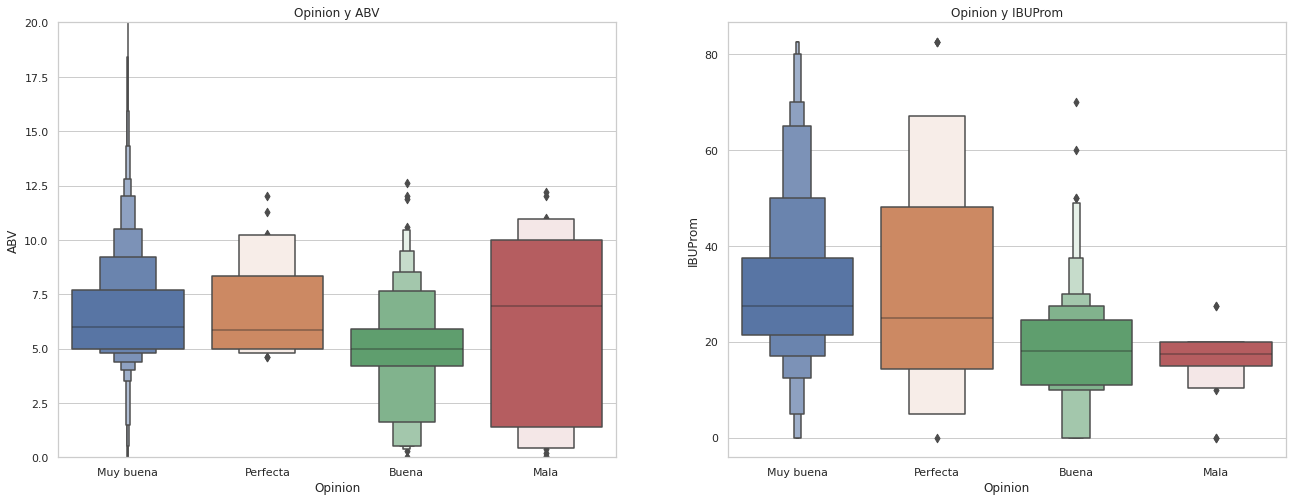

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(22, 8))
sns.boxenplot(data=df, x="Opinion", y="ABV", k_depth="trustworthy",ax=axs[0])
axs[0].set_ylim(0,20)
axs[0].set_title('Opinion y ABV')
sns.boxenplot(data=df, x="Opinion", y="IBUProm", k_depth="trustworthy",ax=axs[1])
axs[1].set_title('Opinion y IBUProm')

# EDA **Outliers**

Distribucion de las variables antes de modificaciones sobre outliers

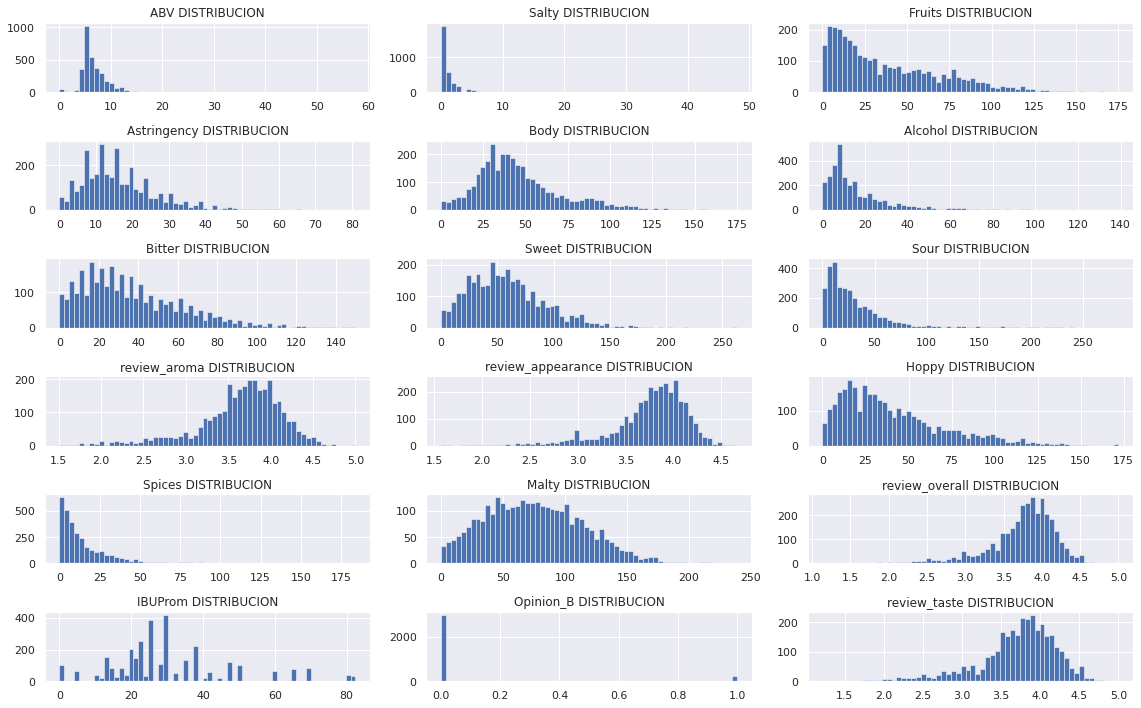

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=3,figsize=(16,10))

axes[0,0].hist(df['ABV'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("ABV DISTRIBUCION");

axes[0,1].hist(df['Salty'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("Salty DISTRIBUCION");

axes[0,2].hist(df['Fruits'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("Fruits DISTRIBUCION");

axes[1,0].hist(df['Astringency'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("Astringency DISTRIBUCION");

axes[1,1].hist(df['Body'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("Body DISTRIBUCION");

axes[1,2].hist(df['Alcohol'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("Alcohol DISTRIBUCION");

axes[2,0].hist(df['Bitter'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("Bitter DISTRIBUCION");

axes[2,1].hist(df['Sweet'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("Sweet DISTRIBUCION");

axes[2,2].hist(df['Sour'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("Sour DISTRIBUCION");

axes[3,0].hist(df['review_aroma'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,0].set_title("review_aroma DISTRIBUCION");

axes[3,1].hist(df['review_appearance'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,1].set_title("review_appearance DISTRIBUCION");

axes[3,2].hist(df['Hoppy'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,2].set_title("Hoppy DISTRIBUCION");

axes[4,0].hist(df['Spices'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,0].set_title("Spices DISTRIBUCION");

axes[4,1].hist(df['Malty'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,1].set_title("Malty DISTRIBUCION");

axes[4,2].hist(df['review_overall'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,2].set_title("review_overall DISTRIBUCION");

axes[5,0].hist(df['IBUProm'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,0].set_title("IBUProm DISTRIBUCION");

axes[5,1].hist(df['Opinion_B'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,1].set_title("Opinion_B DISTRIBUCION");

axes[5,2].hist(df['review_taste'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,2].set_title("review_taste DISTRIBUCION");

plt.tight_layout()

In [ ]:
df_out=df[['ABV','Astringency','Body','Alcohol','Bitter','Sweet', 'Sour','Salty','Fruits','Hoppy',
              'Spices','Malty','review_aroma','review_appearance','review_palate','review_taste','review_overall','IBUProm','Opinion_B']]

In [ ]:
def detect_outliers(df_out,n,features):

  outlier_indices = []
  for col in features:
      #25%
      Q1 = np.percentile(df_out[col], 25)
      #75%
      Q3 = np.percentile(df_out[col],75)
      #IQR
      IQR = Q3 - Q1
      outlier_step = 1.5 * IQR
      outlier_list_col = df_out[(df_out[col] < Q1 - outlier_step) | (df_out[col] > Q3 + outlier_step )].index
      outlier_indices.extend(outlier_list_col)
        
    #observaciones con más de 2 valores atípicos
  outlier_indices = Counter(outlier_indices)        
  multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
  return multiple_outliers   
      #Outliers
Outliers_IQR = detect_outliers(df_out,2,['ABV','Astringency','Body','Alcohol','Bitter','Sweet', 'Sour','Salty','Fruits','Hoppy',
              'Spices','Malty','review_aroma','review_appearance','review_palate','review_taste','review_overall','IBUProm','Opinion_B'])
      #Drop outliers
df_out1 = df_out.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

In [ ]:
print('Cantidad cervezas perfectas antes de descartar valores atípicos: ', len(df[df['Opinion'] == 'Perfecta']),'en porcentaje:', round(df['Opinion'].value_counts()['Perfecta']/len(df) * 100,2), '%')
print('Cantidad cervezas muy buenas antes de descartar valores atípicos: ', len(df[df['Opinion'] == 'Muy buena']),'en porcentaje:', round(df['Opinion'].value_counts()['Muy buena']/len(df) * 100,2), '%')
print('Cantidad cervezas buenas antes de descartar valores atípicos: ', len(df[df['Opinion'] == 'Buena']),'en porcentaje:', round(df['Opinion'].value_counts()['Buena']/len(df) * 100,2), '%')
print('Cantidad cervezas malas antes de descartar valores atípicos: ', len(df[df['Opinion'] == 'Mala']),'en porcentaje:', round(df['Opinion'].value_counts()['Mala']/len(df) * 100,2), '%')

Cantidad cervezas perfectas antes de descartar valores atípicos:  24 en porcentaje: 0.75 %
Cantidad cervezas muy buenas antes de descartar valores atípicos:  2936 en porcentaje: 91.84 %
Cantidad cervezas buenas antes de descartar valores atípicos:  219 en porcentaje: 6.85 %
Cantidad cervezas malas antes de descartar valores atípicos:  18 en porcentaje: 0.56 %


In [ ]:
print('Cantidad cervezas muy buenas o + despues de descartar valores atípicos: ', len(df_out1[df_out1['Opinion_B'] == 0 ]),'en porcentaje:', round(df_out1['Opinion_B'].value_counts()[0]/len(df) * 100,2), '%')
print('Cantidad cervezas muy buenas o - despues de descartar valores atípicos: ', len(df_out1[df_out1['Opinion_B'] == 1 ]),'en porcentaje:', round(df_out1['Opinion_B'].value_counts()[1]/len(df) * 100,2), '%')

Cantidad cervezas muy buenas o + despues de descartar valores atípicos:  2819 en porcentaje: 88.18 %
Cantidad cervezas muy buenas o - despues de descartar valores atípicos:  56 en porcentaje: 1.75 %


In [ ]:
print('Porcentaje de datos quitados en cervezas muy buenas o +:', round((1-(2819/(2936+24)))*100, 2), '%')
print('Porcentaje de datos quitados en cervezas muy buenas o -:', round((1-(56/(219+18)))*100, 2), '%')

Porcentaje de datos quitados en cervezas muy buenas o +: 4.76 %
Porcentaje de datos quitados en cervezas muy buenas o -: 76.37 %


Distribucion de las columnas sin los outliers

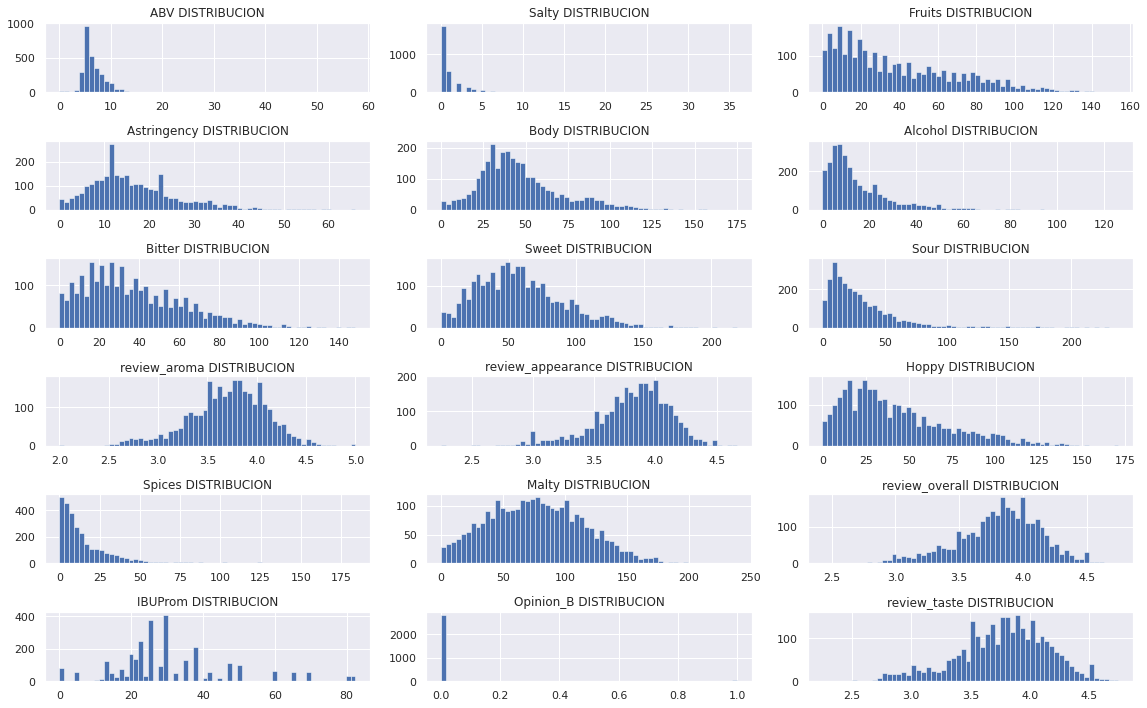

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=3,figsize=(16,10))

axes[0,0].hist(df_out1['ABV'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("ABV DISTRIBUCION");

axes[0,1].hist(df_out1['Salty'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("Salty DISTRIBUCION");

axes[0,2].hist(df_out1['Fruits'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("Fruits DISTRIBUCION");

axes[1,0].hist(df_out1['Astringency'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("Astringency DISTRIBUCION");

axes[1,1].hist(df_out1['Body'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("Body DISTRIBUCION");

axes[1,2].hist(df_out1['Alcohol'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("Alcohol DISTRIBUCION");

axes[2,0].hist(df_out1['Bitter'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("Bitter DISTRIBUCION");

axes[2,1].hist(df_out1['Sweet'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("Sweet DISTRIBUCION");

axes[2,2].hist(df_out1['Sour'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("Sour DISTRIBUCION");

axes[3,0].hist(df_out1['review_aroma'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,0].set_title("review_aroma DISTRIBUCION");

axes[3,1].hist(df_out1['review_appearance'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,1].set_title("review_appearance DISTRIBUCION");

axes[3,2].hist(df_out1['Hoppy'], bins=60, linewidth=0.5, edgecolor="white")
axes[3,2].set_title("Hoppy DISTRIBUCION");

axes[4,0].hist(df_out1['Spices'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,0].set_title("Spices DISTRIBUCION");

axes[4,1].hist(df_out1['Malty'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,1].set_title("Malty DISTRIBUCION");

axes[4,2].hist(df_out1['review_overall'], bins=60, linewidth=0.5, edgecolor="white")
axes[4,2].set_title("review_overall DISTRIBUCION");

axes[5,0].hist(df_out1['IBUProm'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,0].set_title("IBUProm DISTRIBUCION");

axes[5,1].hist(df_out1['Opinion_B'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,1].set_title("Opinion_B DISTRIBUCION");

axes[5,2].hist(df_out1['review_taste'], bins=60, linewidth=0.5, edgecolor="white")
axes[5,2].set_title("review_taste DISTRIBUCION");

plt.tight_layout()

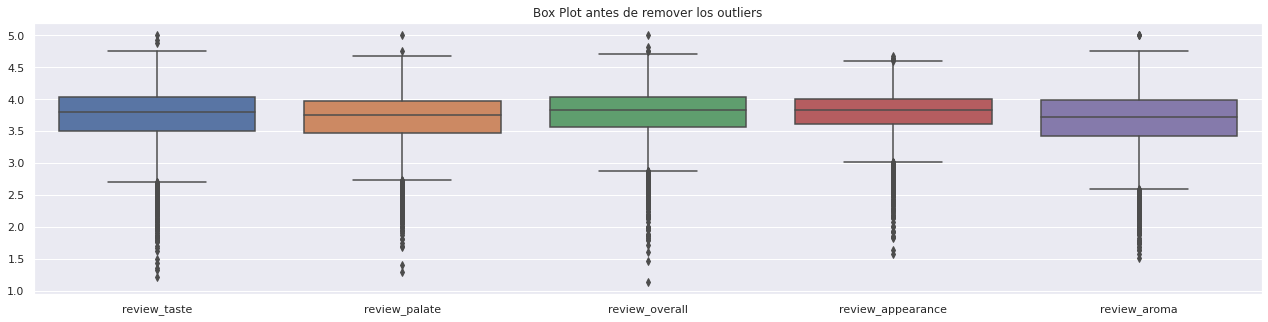

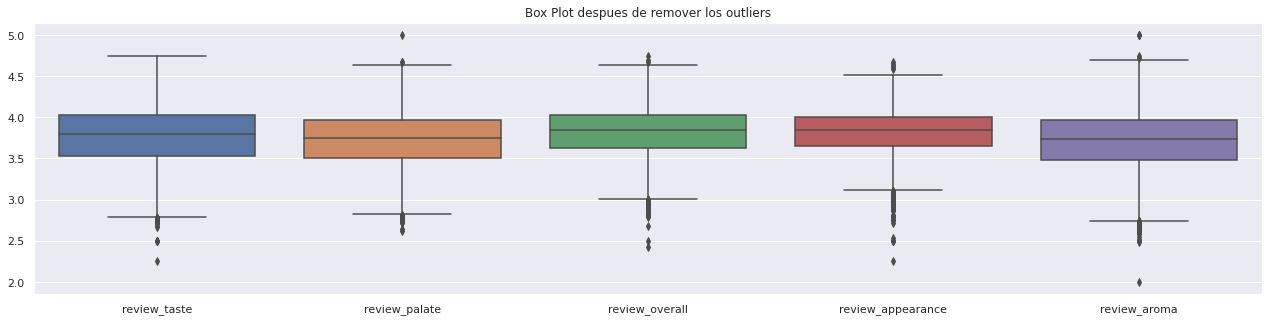

In [ ]:
df_reviews = df[['review_taste','review_palate','review_overall','review_appearance','review_aroma']]
df_reviews_out1 = df_out1[['review_taste','review_palate','review_overall','review_appearance','review_aroma']]


plt.figure(figsize=(22,5))
sns.boxplot(data=df_reviews)
plt.title("Box Plot antes de remover los outliers")
plt.show()
plt.figure(figsize=(22,5))
sns.boxplot(data=df_reviews_out1)
plt.title("Box Plot despues de remover los outliers")
plt.show()

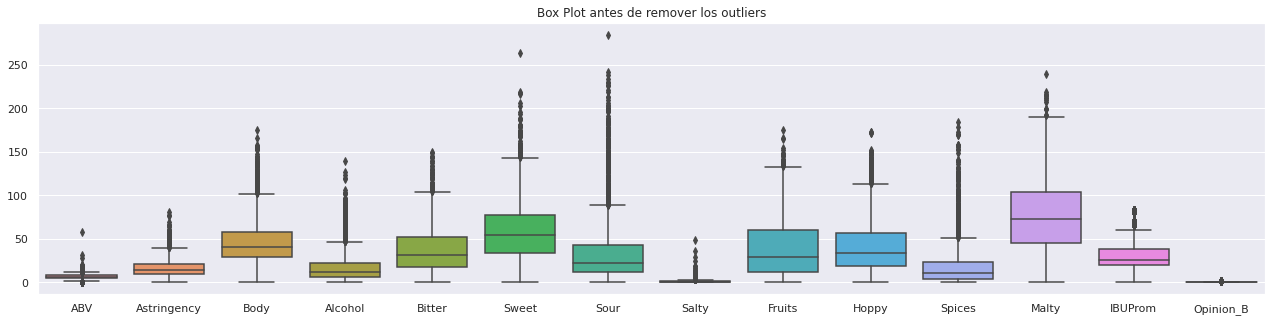

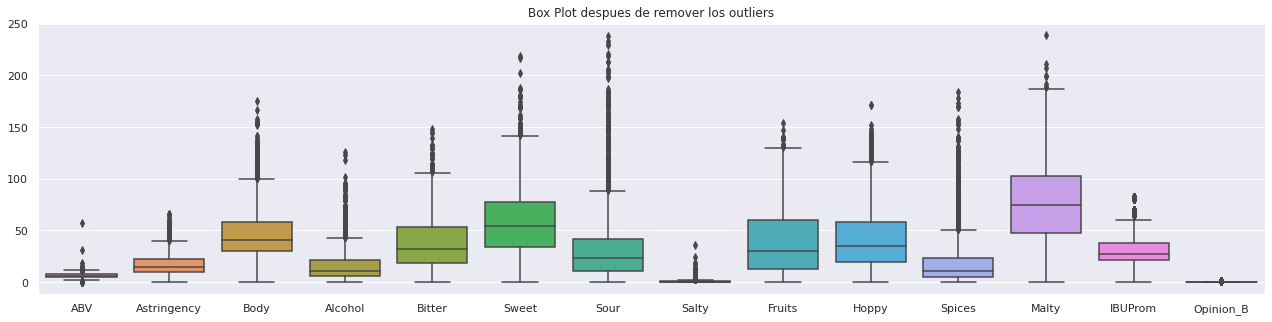

In [ ]:
df_no_reviews = df.drop(columns=['review_taste','review_palate','review_overall','review_appearance','review_aroma','number_of_reviews','Min IBU','Max IBU'])
df_no_reviews_out1 = df_out1.drop(columns=['review_taste','review_palate','review_overall','review_appearance','review_aroma'])


plt.figure(figsize=(22,5))
sns.boxplot(data=df_no_reviews)
plt.title("Box Plot antes de remover los outliers")
plt.show()
plt.figure(figsize=(22,5))
sns.boxplot(data=df_no_reviews_out1)
plt.title("Box Plot despues de remover los outliers")
plt.show()

# EDA **En general, ¿Los distintos gustos en las cervezas que opinion tiene?, ¿qué influye mas en la opinion?** 

Esta matriz de correlacion sera usada en lo que sigue del proyecto. Se informa.

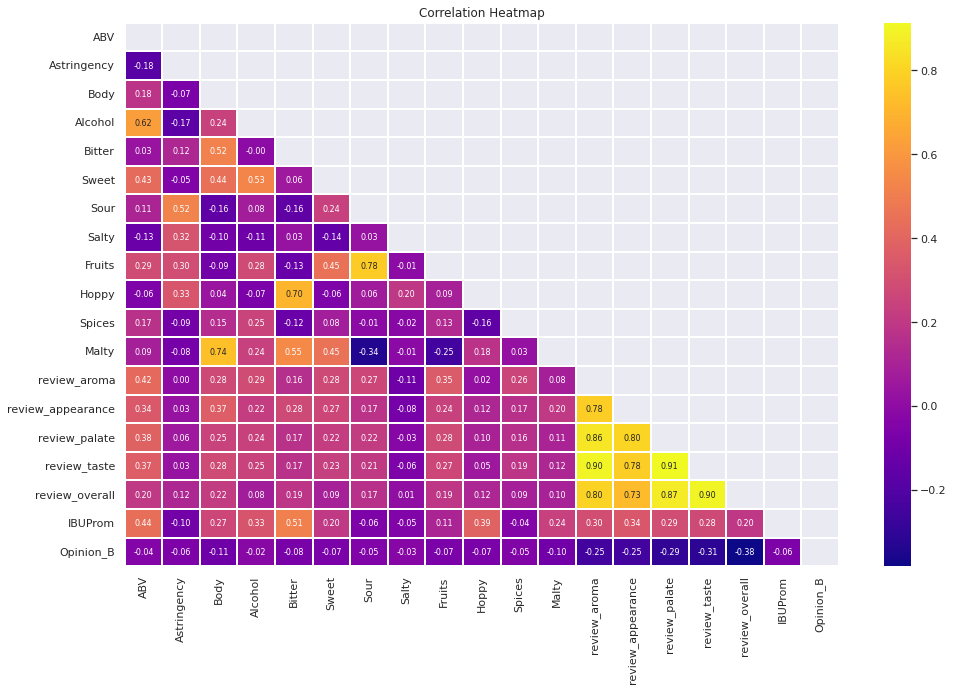

In [ ]:
plt.figure(figsize= (16,10))
mask = np.triu(np.ones_like(df_out1.corr(),dtype = bool))
sns.heatmap(df_out1.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma', annot_kws={'size':8})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

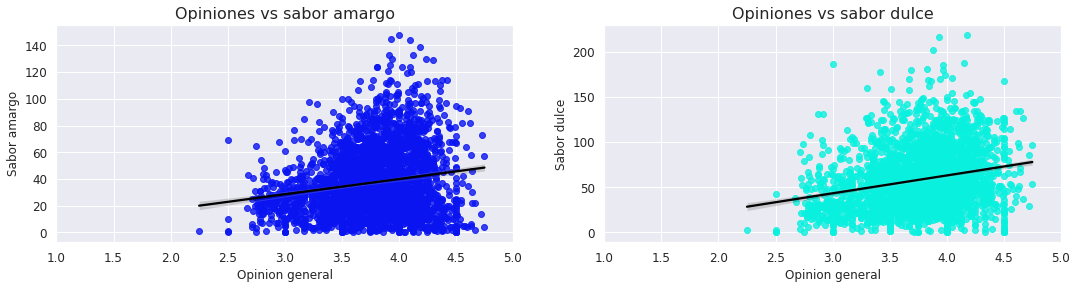

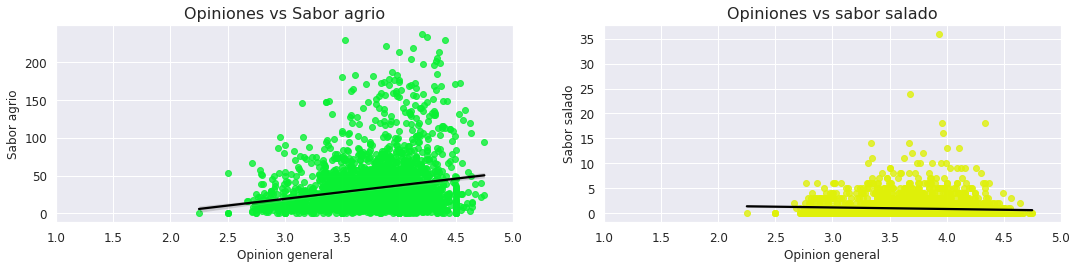

In [ ]:
#Opiniones vs sabor amargo
plt.figure(figsize=(18,4))
plt.subplot(121)
sns.regplot(x=df_out1["review_taste"], y=df_out1["Bitter"], scatter_kws={"color": "#0914F1"}, line_kws={"color": "black"})
plt.yticks(fontsize=12)
plt.ylabel('Sabor amargo', fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(1, 5)
plt.xlabel('Opinion general', fontsize=12)
plt.title('Opiniones vs sabor amargo', fontsize=16);

#Opiniones vs sabor dulce
plt.subplot(122)
sns.regplot(x=df_out1["review_taste"], y=df_out1["Sweet"], scatter_kws={"color": "#09F1DF"}, line_kws={"color": "black"})
plt.yticks(fontsize=12)
plt.ylabel('Sabor dulce', fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(1, 5)
plt.xlabel('Opinion general', fontsize=12)
plt.title('Opiniones vs sabor dulce', fontsize=16);

#Opiniones vs sabor agrio
plt.figure(figsize=(18,8))
plt.subplot(221)
sns.regplot(x=df_out1["review_taste"], y=df_out1["Sour"], scatter_kws={"color": "#09F133"}, line_kws={"color": "black"})
plt.yticks(fontsize=12)
plt.ylabel('Sabor agrio', fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(1, 5)
plt.xlabel('Opinion general', fontsize=12)
plt.title('Opiniones vs Sabor agrio', fontsize=16);

#Opiniones vs sabor salado
plt.subplot(222)
sns.regplot(x=df_out1["review_taste"], y=df_out1["Salty"], scatter_kws={"color": "#DFF109"}, line_kws={"color": "black"})
plt.yticks(fontsize=12)
plt.ylabel('Sabor salado', fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(1, 5)
plt.xlabel('Opinion general', fontsize=12)
plt.title('Opiniones vs sabor salado', fontsize=16);
plt.show()

Hay mayores opiones positivas segun mas amargor tenga. En general una cerveza amarga gusta mas. Pero en valores de 0 y 80 se nota mucho mas.

Hay mayores opiones positivas segun mas dulzura tenga. En general una cerveza dulce gusta mas. Pero en valores de 0 y 100 se nota mucho mas.

Hay mayores opiones positivas segun mas sabor agrio tenga. En general una cerveza agria gusta un poco mas. AUNQUE la cantidad de opiniones mas pisitivas posees muy poco sabor agrio. Ahi donde se concentran mas.

En general una cerveza con sabor salado no gusta en demacia.

# EDA **Entonces ahora ¿que relacion existe con el gusto amargo?**

**¿Sera mayor la relacion entre el Lupulo con el gusto amargo?**

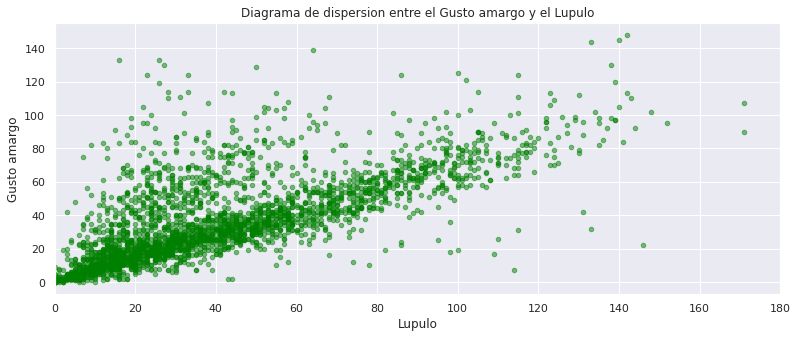

In [ ]:
fig, ax = plt.subplots(figsize=(13,5))
ax.scatter(df_out1.Hoppy, df_out1.Bitter,s=20, alpha=0.5, color='green')
ax.set_title('Diagrama de dispersion entre el Gusto amargo y el Lupulo')
ax.set_xlabel('Lupulo')
ax.set_ylabel('Gusto amargo')

plt.xlim(0,180)

plt.show();


In [ ]:
from statsmodels.regression.linear_model import OLS
lmLu = OLS(df_out1['Bitter'], df_out1[['Hoppy']]).fit()
print(lmLu.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Bitter   R-squared (uncentered):                   0.816
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                          1.278e+04
Date:                Sat, 28 Jan 2023   Prob (F-statistic):                        0.00
Time:                        15:35:49   Log-Likelihood:                         -12591.
No. Observations:                2875   AIC:                                  2.518e+04
Df Residuals:                    2874   BIC:                                  2.519e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Se ve una relacion mucho mas clara, lo cual tiene sentido porque el lúpulo aporta la mayor parte del amargor en la cerveza a través de sus resinas.

Aun asi, agregando una regresion para observar mejor la relacion entre el amargor y Lupulo se tiene un r^2 0.816. Buena relacion, como se puede ver.


**¿Y la relacion entre la malta y el gusto amargo en si?**

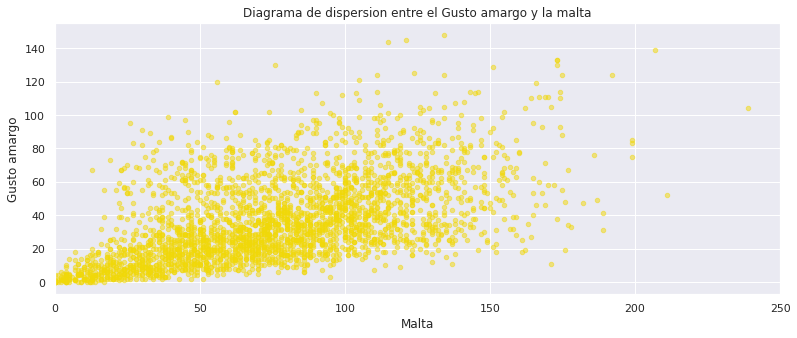

In [ ]:
fig, ax = plt.subplots(figsize=(13,5))
ax.scatter(df_out1.Malty, df_out1.Bitter,s=20, alpha=0.5, color='#F1D809')
ax.set_title('Diagrama de dispersion entre el Gusto amargo y la malta')
ax.set_xlabel('Malta')
ax.set_ylabel('Gusto amargo')

plt.xlim(0,250)

plt.show();

In [ ]:
lmLu = OLS(df_out1['Bitter'], df_out1[['Malty']]).fit()
print(lmLu.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Bitter   R-squared (uncentered):                   0.769
Model:                            OLS   Adj. R-squared (uncentered):              0.769
Method:                 Least Squares   F-statistic:                              9592.
Date:                Sat, 28 Jan 2023   Prob (F-statistic):                        0.00
Time:                        15:35:49   Log-Likelihood:                         -12918.
No. Observations:                2875   AIC:                                  2.584e+04
Df Residuals:                    2874   BIC:                                  2.584e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Con una cerveza sin malta o poca se considera poco amarga, luego al aumentar la malta mantiene cierta constancia creciente en el gusto amargo.

con un r^2 de 0,769 , bien. 

Tiene sentido ya que el amargor depende un poco mas en la malta.

**¿y la relacion entre las frutas con el gusto amargo?**

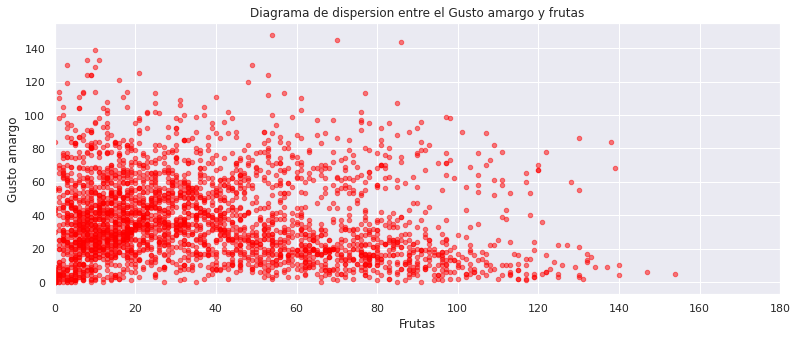

In [ ]:
fig, ax = plt.subplots(figsize=(13,5))
ax.scatter(df_out1.Fruits, df_out1.Bitter,s=20, alpha=0.5, color='red')
ax.set_title('Diagrama de dispersion entre el Gusto amargo y frutas')
ax.set_xlabel('Frutas')
ax.set_ylabel('Gusto amargo')

plt.xlim(0,180)

plt.show();

In [ ]:
modelFruits = 'Bitter~Fruits' 
lmLu = OLS(df_out1['Bitter'], df_out1[['Fruits']]).fit()
print(lmLu.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Bitter   R-squared (uncentered):                   0.361
Model:                            OLS   Adj. R-squared (uncentered):              0.361
Method:                 Least Squares   F-statistic:                              1627.
Date:                Sat, 28 Jan 2023   Prob (F-statistic):                   2.71e-282
Time:                        15:35:50   Log-Likelihood:                         -14383.
No. Observations:                2875   AIC:                                  2.877e+04
Df Residuals:                    2874   BIC:                                  2.877e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Con una cerveza sin frutas o pocas, a partir de 0 algunos ya la consideran amarga, luego al aumentar las frutas mantiene cierta constancia en el gusto amargo y hasta tienden a disminuir.

con un r^2 de 0,361 , poco.

Tiene sentido ya que el amargor depende en poca cantidad de las frutas.

**Relacion entre las especias y el gusto amargo en si.**

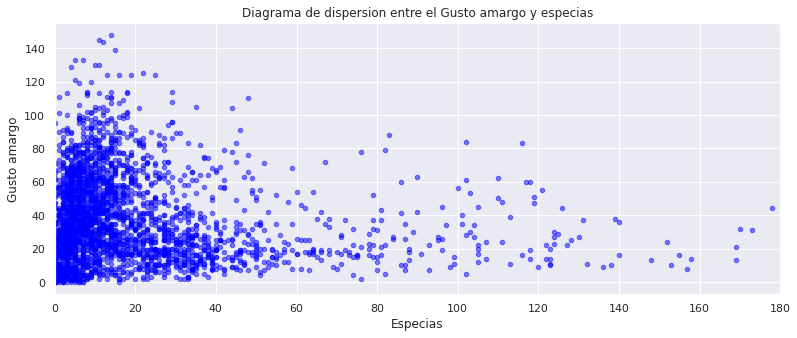

In [ ]:
fig, ax = plt.subplots(figsize=(13,5))
ax.scatter(df_out1.Spices, df_out1.Bitter,s=20, alpha=0.5, color='blue')
ax.set_title('Diagrama de dispersion entre el Gusto amargo y especias')
ax.set_xlabel('Especias')
ax.set_ylabel('Gusto amargo')

plt.xlim(0,180)

plt.show();

In [ ]:
modelSpices = 'Bitter~Spices'
lmLu = OLS(df_out1['Bitter'], df_out1[['Spices']]).fit()
print(lmLu.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Bitter   R-squared (uncentered):                   0.211
Model:                            OLS   Adj. R-squared (uncentered):              0.211
Method:                 Least Squares   F-statistic:                              770.0
Date:                Sat, 28 Jan 2023   Prob (F-statistic):                   2.33e-150
Time:                        15:35:50   Log-Likelihood:                         -14686.
No. Observations:                2875   AIC:                                  2.937e+04
Df Residuals:                    2874   BIC:                                  2.938e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Con una cerveza sin especias o pocas, a partir de 0 algunos ya la consideran amarga, luego al aumentar las especias mantiene cierta constancia en el gusto amargo.

con un r^2 de 0,211 , extremadamente poco.

Tiene sentido ya que el amargor depende en poca cantidad de las especias, muchos ingredientes como el lupulo agregan amargor.

**Entonces, en orden de influencia en el gusto amargo, queda:**


1.   Lupulo
2.   Malta
3.   Frutas
4.   Especias



# EDA **¿Como estan distribuidos estos ingredientes del gusto amargo (tan gustado y caracteristico) en las cervezas?**

In [ ]:
df_out1= df_out1.assign(Style=df['Style'])
df_out1.head(1)

,ABV,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,IBUProm,Opinion_B,Style
0,5.30,13,32,9,47,74,33,0,33,57,8,111,3.50,3.64,3.56,3.64,3.85,37.50,0,Altbier


In [ ]:
df_out1.shape

(2875, 20)

**Con las cervezas con puntuacion de mas de 3.5 puntos (muy buenas y excelentes)**

In [ ]:
df_TOP = df_out1[(df_out1['Opinion_B'] == 0)]
df_TOP.shape

(2819, 20)

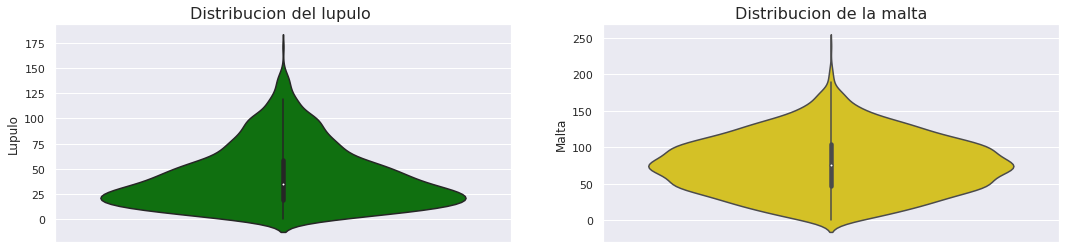

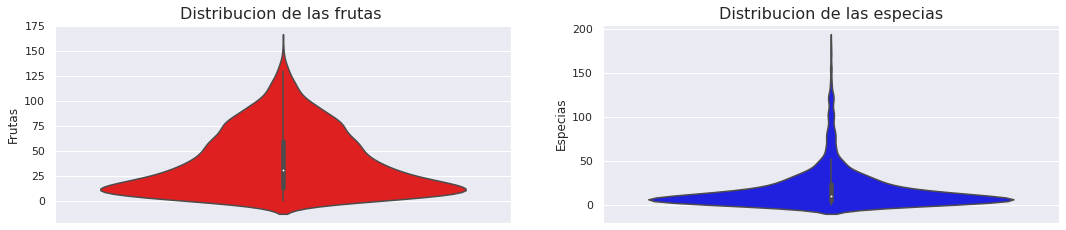

In [ ]:
#Distribucion del lupulo 
plt.figure(figsize=(18,4))
plt.subplot(121)
sns.violinplot(y=df_TOP["Hoppy"], color='green')
plt.ylabel('Lupulo', fontsize=12)
plt.title('Distribucion del lupulo ', fontsize=16);

#Distribucion de la malta
plt.subplot(122)
sns.violinplot(y=df_TOP["Malty"], color='#F1D809')
plt.ylabel('Malta', fontsize=12)
plt.title('Distribucion de la malta', fontsize=16);

#Distribucion de las frutas 
plt.figure(figsize=(18,8))
plt.subplot(221)
sns.violinplot(y=df_TOP["Fruits"], color='red')
plt.ylabel('Frutas', fontsize=12)
plt.title('Distribucion de las frutas ', fontsize=16);

#Distribucion de las especias 
plt.subplot(222)
sns.violinplot(y=df_TOP["Spices"], color='blue')
plt.ylabel('Especias', fontsize=12)
plt.title('Distribucion de las especias', fontsize=16);

En este caso, el gráfico de violin muestra la distribución del lúpulo en un conjunto de cervezas. Si el gráfico muestra que la mayor parte del lúpulo se encuentra entre los valores 15 y 75, significa que la mayoría de las cervezas tienen una cantidad de lúpulo en ese rango. Es posible que haya algunas cervezas con cantidades de lúpulo más bajas o más altas, pero la mayoría se encuentran en ese rango. El lúpulo es un ingrediente importante en la elaboración de cerveza, ya que proporciona sabor y aroma característicos y actúa como conservante natural. La cantidad de lúpulo utilizada en la elaboración de una cerveza puede variar según el estilo y el sabor deseado.


El gráfico muestra que la mayor parte de la malta se encuentra entre los valores 40 y 130, significa que la mayoría de las cervezas tienen una cantidad de malta en ese rango. Es posible que haya algunas cervezas con cantidades de malta más bajas o más altas, pero la mayoría se encuentran en ese rango.


El gráfico de violin muestra que la mayor parte de las frutas (cervezas) está entre los valores 0 y 80, esto puede indicar que la mayoría de las frutas (cervezas) tienen un valor entre 0 y 80. Esto puede ser útil para entender qué tan común es que las frutas (cervezas) tengan un valor en ese rango y cómo se comparan con otros valores.


El contenido de especias de diferentes cervezas, un gráfico de violin que muestra que la mayoría de las cervezas tienen un contenido de especias entre 0 y 20 podría indicar que la mayoría de las cervezas contiene poco de este ingrediente. Sin embargo, es necesario tener en cuenta otros factores, como el tipo de cerveza y la región donde se produce, para obtener una interpretación más completa de los datos.


# EDA **Comparaciones de estilos de cervezas y la opinion de las mismas ¿Cuales estilos gustan mas y cuales menos? Analisis**


In [ ]:
df_data = pd.DataFrame(beer)
df = df_data[['Style','ABV','IBUProm','Astringency','Body','Alcohol','Bitter','Sweet', 'Sour','Salty','Fruits','Hoppy',
              'Spices','Malty','review_aroma','review_appearance','review_palate','review_taste','review_overall','Opinion']]
df.head(1)

,Style,ABV,IBUProm,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,Opinion
0,Altbier,5.30,37.50,13,32,9,47,74,33,0,33,57,8,111,3.50,3.64,3.56,3.64,3.85,Muy buena


Vemos las opiniones segun los estilos de cervezas, con la idea de seleccionar los estilo mas puntuados con los menos gustados para hacer asi comparaciones de gustos.

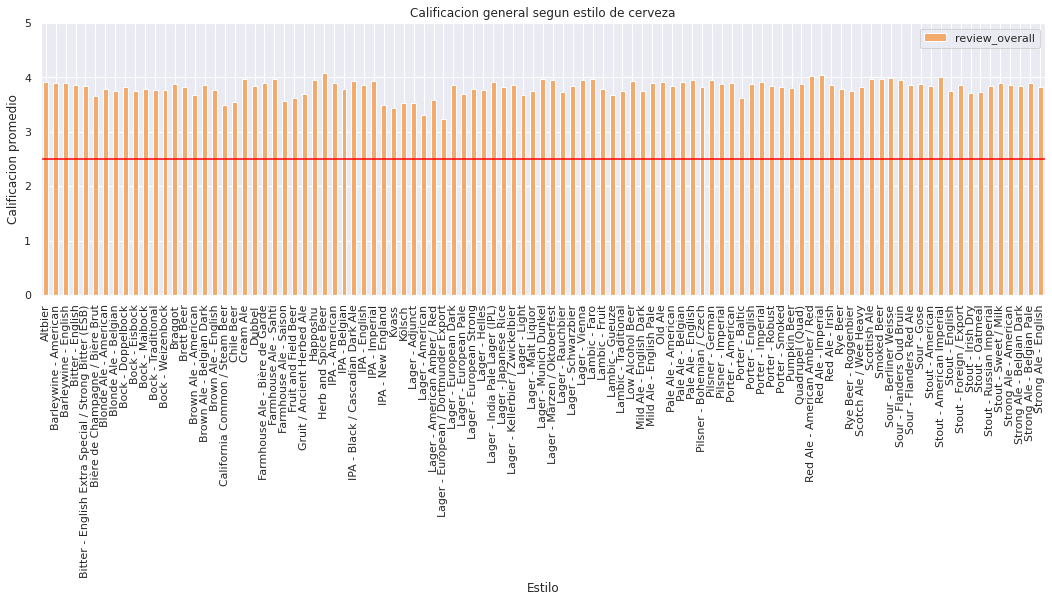

In [ ]:
fig, ax = plt.subplots(figsize=(18,5))
df_out1.groupby('Style')['review_overall'].mean().plot(kind='bar', legend='Reverse', color='#F2AB6D' )
ax.set_title('Calificacion general segun estilo de cerveza')
ax.set_xlabel('Estilo')
ax.set_ylabel('Calificacion promedio')

plt.ylim(0,5)
plt.axhline(y=2.5, c='red')

plt.show();

In [ ]:
print('En orden de puntuacion:', df_out1.groupby('Style')['review_overall'].mean().sort_values(ascending=False).head(2))

En orden de puntuacion: Style
Herb and Spice Beer   4.07
Red Ale - Imperial    4.04
Name: review_overall, dtype: float64


In [ ]:
print('En orden de puntuacion:', df_out1.groupby('Style')['review_overall'].mean().sort_values(ascending=True).head(2))

En orden de puntuacion: Style
Lager - European / Dortmunder Export   3.23
Lager - American                       3.31
Name: review_overall, dtype: float64


In [ ]:
print('Cantidad de opiniones sobre Herb and Spice Beer:', df_out1.loc[df_out1['Style'] == 'Herb and Spice Beer'].shape[0])
print('Cantidad de opiniones sobre Red Ale - Imperial:', df_out1.loc[df_out1['Style'] == 'Red Ale - Imperial'].shape[0])
print('Cantidad de opiniones sobre Lager - European / Dortmunder Export:', df_out1.loc[df_out1['Style'] == 'Lager - European / Dortmunder Export'].shape[0])
print('Cantidad de opiniones sobre Lager - American:', df_out1.loc[df_out1['Style'] == 'Lager - American'].shape[0])

Cantidad de opiniones sobre Herb and Spice Beer: 24
Cantidad de opiniones sobre Red Ale - Imperial: 19
Cantidad de opiniones sobre Lager - European / Dortmunder Export: 35
Cantidad de opiniones sobre Lager - American: 22


In [ ]:
#Seleccion conveniente de cervezas mas puntuadas y menos puntuadas y vista de cantidad.
df_LAB = df_out1[(df_out1['Style'] == 'Herb and Spice Beer') | (df_out1['Style'] == 'Red Ale - Imperial') | (df_out1['Style'] == 'Lager - European / Dortmunder Export') | (df_out1['Style'] == 'Lager - American')]
df_LAB.shape

(100, 20)

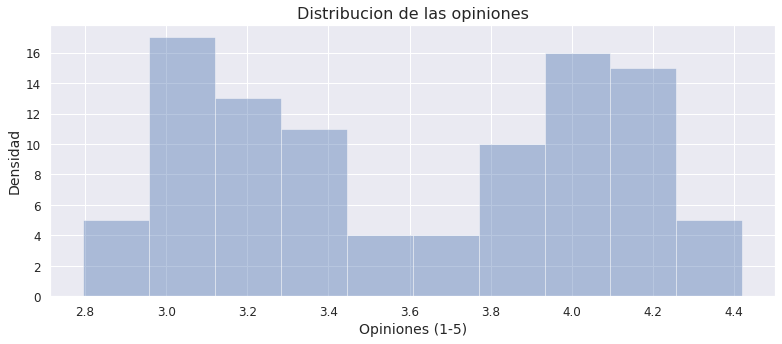

In [ ]:
#Distribucion con la forma esperada
plt.figure(figsize=(13,5))
x = df_LAB['review_overall']

sns.distplot(x, bins=10, kde=False)
plt.title('Distribucion de las opiniones', fontsize=16)
plt.xlabel('Opiniones (1-5)', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Densidad', fontsize=14)
plt.yticks(fontsize=12)
plt.show();

In [ ]:
#Para trabajar de manera mas organizada
df_HerbandSpiceBeer = df_out1[df_out1['Style'] == 'Herb and Spice Beer']
df_RedAleImperial = df_out1[df_out1['Style'] == 'Red Ale - Imperial']
df_LagerEuropeanDortmunderExport = df_out1[df_out1['Style'] == 'Lager - European / Dortmunder Export']
df_LagerAmerican = df_out1[df_out1['Style'] == 'Lager - American']

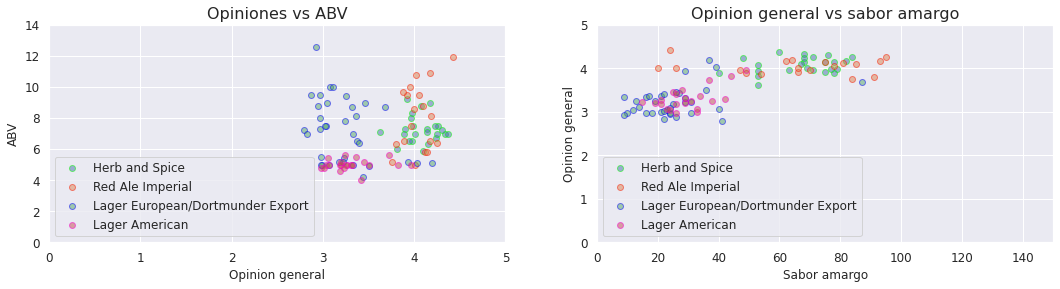

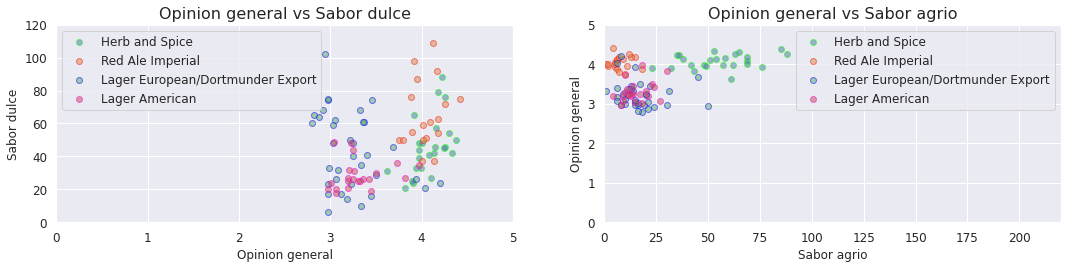

In [ ]:
#Opiniones vs ABV
plt.figure(figsize=(18,4))
plt.subplot(121)
plt.scatter(df_HerbandSpiceBeer['review_overall'], df_HerbandSpiceBeer['ABV'], edgecolor='#04F801', alpha=0.5, label= 'Herb and Spice')
plt.scatter(df_RedAleImperial['review_overall'], df_RedAleImperial['ABV'], edgecolor='#F81B01', alpha=0.5, label= 'Red Ale Imperial')
plt.scatter(df_LagerEuropeanDortmunderExport['review_overall'], df_LagerEuropeanDortmunderExport['ABV'], edgecolor='#0104F8', alpha=0.5, label= 'Lager European/Dortmunder Export')
plt.scatter(df_LagerAmerican['review_overall'], df_LagerAmerican['ABV'], edgecolor='#F801CF', alpha=0.5, label= 'Lager American')
plt.legend(loc='best', fontsize=12)
plt.ylim(0, 14)
plt.yticks(fontsize=12)
plt.ylabel('ABV', fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(0, 5)
plt.xlabel('Opinion general', fontsize=12)
plt.title('Opiniones vs ABV', fontsize=16);

#Opiniones vs sabor amargo
plt.subplot(122)
plt.scatter(df_HerbandSpiceBeer['Bitter'], df_HerbandSpiceBeer['review_overall'], edgecolor='#04F801', alpha=0.5, label= 'Herb and Spice')
plt.scatter(df_RedAleImperial['Bitter'], df_RedAleImperial['review_overall'], edgecolor='#F81B01', alpha=0.5, label= 'Red Ale Imperial')
plt.scatter(df_LagerEuropeanDortmunderExport['Bitter'], df_LagerEuropeanDortmunderExport['review_overall'], edgecolor='#0104F8', alpha=0.5, label= 'Lager European/Dortmunder Export')
plt.scatter(df_LagerAmerican['Bitter'], df_LagerAmerican['review_overall'], edgecolor='#F801CF', alpha=0.5, label= 'Lager American')
plt.legend(loc='best', fontsize=12)
plt.xlim(0, 150)
plt.xlabel('Sabor amargo', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 5)
plt.ylabel('Opinion general', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Opinion general vs sabor amargo', fontsize=16)

#Opiniones vs sabor dulce
plt.figure(figsize=(18,8))
plt.subplot(221)
plt.scatter(df_HerbandSpiceBeer['review_overall'], df_HerbandSpiceBeer['Sweet'], edgecolor='#04F801', alpha=0.5, label= 'Herb and Spice')
plt.scatter(df_RedAleImperial['review_overall'], df_RedAleImperial['Sweet'], edgecolor='#F81B01', alpha=0.5, label= 'Red Ale Imperial')
plt.scatter(df_LagerEuropeanDortmunderExport['review_overall'], df_LagerEuropeanDortmunderExport['Sweet'], edgecolor='#0104F8', alpha=0.5, label= 'Lager European/Dortmunder Export')
plt.scatter(df_LagerAmerican['review_overall'], df_LagerAmerican['Sweet'], edgecolor='#F801CF', alpha=0.5, label= 'Lager American')
plt.legend(loc='best', fontsize=12)
plt.xlim(0, 5)
plt.xlabel('Opinion general', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 120)
plt.ylabel('Sabor dulce', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Opinion general vs Sabor dulce', fontsize=16)

#Opiniones vs sabor agrio
plt.subplot(222)
plt.scatter(df_HerbandSpiceBeer['Sour'], df_HerbandSpiceBeer['review_overall'], edgecolor='#04F801', alpha=0.5, label= 'Herb and Spice')
plt.scatter(df_RedAleImperial['Sour'], df_RedAleImperial['review_overall'], edgecolor='#F81B01', alpha=0.5, label= 'Red Ale Imperial')
plt.scatter(df_LagerEuropeanDortmunderExport['Sour'], df_LagerEuropeanDortmunderExport['review_overall'], edgecolor='#0104F8', alpha=0.5, label= 'Lager European/Dortmunder Export')
plt.scatter(df_LagerAmerican['Sour'], df_LagerAmerican['review_overall'], edgecolor='#F801CF', alpha=0.5, label= 'Lager American')
plt.legend(loc='best', fontsize=12)
plt.xlim(0, 220)
plt.xlabel('Sabor agrio', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 5)
plt.ylabel('Opinion general', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Opinion general vs Sabor agrio', fontsize=16)
plt.show()

**En las distribuciones basadas en el estilo es donde se encuentran las diferencias.**

Las graficas muestran algunos grupos claros. Por ejemplo, hay un grupo de opiniones alrededor del rango de ABV (Alcohol By Volume) de 5-12 en la tabla de opiniones vs ABV, lo que podría deberse al hecho de que la gente prefiere esa cantidad de alcohol, porque es la cantidad que permite un control del **efecto alcohol-consumicion**. 

También hay una franja de Amargor entre 20-100 en la tabla de Opinion frente a gusto amargo, que valen 4 puntos de opinion aproximadamente. No está claro exactamente cuál proporcion de lupulo es la dominante en gusto, pero podrían ser la conjuncion con otros elementos como se ve luego (Ej. sabor dulce o agrio). También hay una franja de opiniones bajas donde existe menor menor.

En el gráfico de Opinion versus sabor dulce, hay una franja de personas que opinan que existe un gusto dulce entre 20 a 120 en las cervezas mas valoradas (opinion). ¿Gusto por lo dulce?

En el gráfico de Opinion versus sabor agrio,el estilo mejor puntuado tiene un alto nivel agrio entre 25 y 90, pero el segundo estilo mas puntuado tiene un nivel entre 0 y 20 de nivel agrio. Esto ultimo es igual en los estilos menos puntuados.




**EN CONCLUSION:**

1.  **Herb and Spice:** el ABV entre 6% y 10%, el sabor amargo entre 40 y 85, un sabor dulce entre 20 y 105, y un sabor agrio entre 25 y 85. Es la clave para la cerveza de mejor puntuacion.
DULCE, MUY AGRIA Y AMARGA. ALCOHOL PROMEDIO.

2.   **Red Ale Imperial:**el ABV entre 5% y 12%, el sabor amargo entre 20 y 90, un sabor dulce entre 40 y 110, y un sabor agrio entre 0 y 20. Es la clave para la  2da cerveza de mejor puntuacion.
DULCE, AMARGA, MINIMO AGRIA. ALCOHOL PROMEDIO.

3.   **Lager European/Dortmunder Export:**el ABV entre 4% y 13%, el sabor amargo entre 10 y 40, un sabor dulce entre 20 y 80, y un sabor agrio entre 0 y 30. Es la clave para una cerveza con opinion negativa.
DULCE, POCO AGRIA, POCO AMARGA. ALCOHOL PROMEDIO.

4.   **Lager American:**el ABV entre 4% y 6%, el sabor amargo entre 20 y 40, un sabor dulce entre 20 y 50, y un sabor agrio entre 5 y 25. Es la clave para una cerveza con opinion muy negativa.
POCO DULCE, POCO AGRIA, MEDIO AMARGO. POCO ALCOHOL.






# Pre seleccion de modelo **Lazy pred**

In [ ]:
X = df_out1.drop(columns = ["review_overall",'Style'])     # feature matrix
y = df_out1['review_overall']                      # target feature
df_out1.head(1)

,ABV,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,IBUProm,Opinion_B,Style
0,5.30,13,32,9,47,74,33,0,33,57,8,111,3.50,3.64,3.56,3.64,3.85,37.50,0,Altbier


In [ ]:
X.head(2)

,ABV,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,IBUProm,Opinion_B
0,5.30,13,32,9,47,74,33,0,33,57,8,111,3.50,3.64,3.56,3.64,37.50,0
1,7.20,12,57,18,33,55,16,0,24,35,12,84,3.80,3.85,3.90,4.02,37.50,0


In [ ]:
y.head(2)

0   3.85
1   4.03
Name: review_overall, dtype: float64

**Eliminación bidireccional (stepwise)**

In [ ]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features
warnings.filterwarnings('ignore')
stepwise_selection(X,y)

['review_taste',
 'Alcohol',
 'review_palate',
 'Opinion_B',
 'ABV',
 'Sweet',
 'Spices',
 'Astringency',
 'Sour',
 'Fruits',
 'IBUProm',
 'Malty',
 'review_aroma']

In [ ]:
df2 = df_out1[['ABV','Alcohol','Sweet','Spices','Astringency','Sour','Salty','Hoppy','Body','Fruits','IBUProm','Malty','review_overall']]
df2.head(1)

,ABV,Alcohol,Sweet,Spices,Astringency,Sour,Salty,Hoppy,Body,Fruits,IBUProm,Malty,review_overall
0,5.30,9,74,8,13,33,0,57,32,33,37.50,111,3.85


In [ ]:
X = df2.drop(columns = ['review_overall'])     # feature matrix
y = df2['review_overall']                      # target feature

In [ ]:
print('Min target:', min(y), 'Max target:', max(y))

Min target: 2.428571 Max target: 4.75


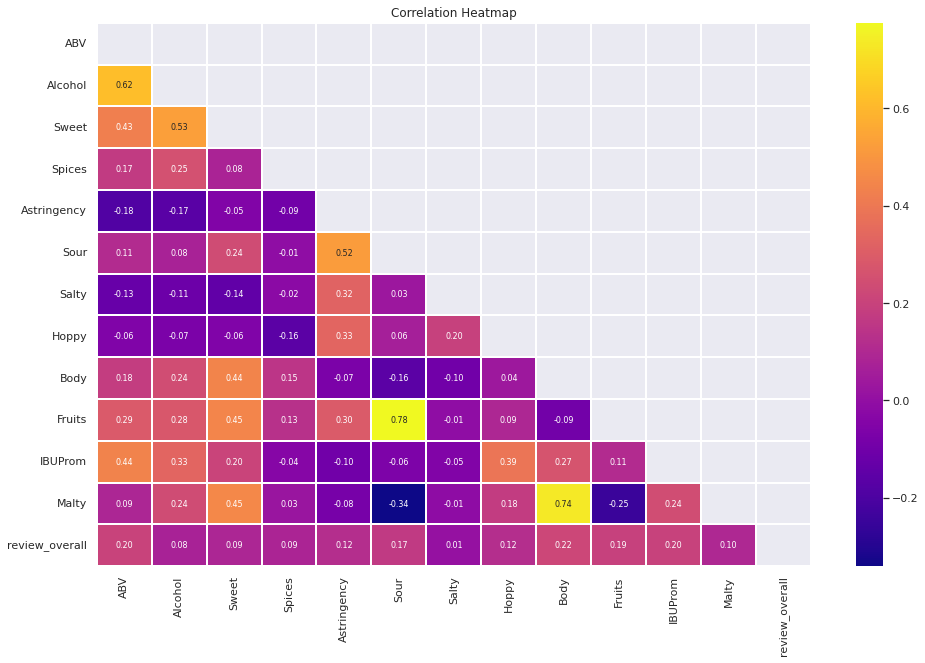

In [ ]:
plt.figure(figsize= (16,10))
mask = np.triu(np.ones_like(df2.corr(),dtype = bool))
sns.heatmap(df2.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma', annot_kws={'size':8})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
models, predictions = LazyRegressor().fit(X_train, X_test, y_train, y_test)
print(models[:10])

 90%|█████████ | 38/42 [05:19<01:01, 15.32s/it]

[16:10:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [05:20<00:00,  7.63s/it]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
SVR                                          0.24       0.26  0.27        0.41
NuSVR                                        0.24       0.26  0.27        0.46
HistGradientBoostingRegressor                0.24       0.25  0.27        2.28
ExtraTreesRegressor                          0.23       0.25  0.27        0.88
GradientBoostingRegressor                    0.22       0.24  0.28        0.84
LGBMRegressor                                0.22       0.23  0.28        0.20
RandomForestRegressor                        0.20       0.21  0.28        1.72
XGBRegressor                                 0.20       0.21  0.28        0.22
MLPRegressor                                 0.18       0.19  0.28        6.69
BaggingRegressor                             0.16       0.18  0.29        0.18


Malos resultados, se vera agregando las opiniones de gusto, aroma, apariencia y sabor.

In [ ]:
df3 = df_out1[['ABV','Alcohol','Sweet','Spices','Astringency','Sour','Salty','Hoppy','Body','Fruits','IBUProm','Malty','review_overall','review_aroma','review_palate','review_appearance','review_taste']]
df3.head(1)

,ABV,Alcohol,Sweet,Spices,Astringency,Sour,Salty,Hoppy,Body,Fruits,IBUProm,Malty,review_overall,review_aroma,review_palate,review_appearance,review_taste
0,5.30,9,74,8,13,33,0,57,32,33,37.50,111,3.85,3.50,3.56,3.64,3.64


In [ ]:
X = df3.drop(columns = ['review_overall'])     # feature matrix
y = df3['review_overall']                      # target feature

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
models, predictions = LazyRegressor().fit(X_train, X_test, y_train, y_test)
print(models[:10])

 90%|█████████ | 38/42 [06:17<01:11, 17.86s/it]

[16:26:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [06:17<00:00,  8.99s/it]

                            Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                      
HuberRegressor                            0.86       0.87  0.12        0.06
LinearSVR                                 0.86       0.87  0.12        0.20
SGDRegressor                              0.86       0.86  0.12        0.02
BayesianRidge                             0.86       0.86  0.12        0.04
Ridge                                     0.86       0.86  0.12        0.02
RidgeCV                                   0.86       0.86  0.12        0.02
TransformedTargetRegressor                0.86       0.86  0.12        0.02
LinearRegression                          0.86       0.86  0.12        0.03
Lars                                      0.86       0.86  0.12        0.05
LassoLarsIC                               0.86       0.86  0.12        0.02


[(0.0, 1.0)]

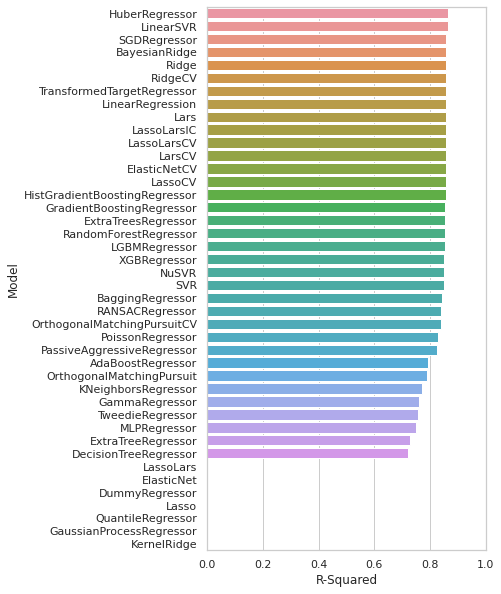

In [ ]:
predictions["R-Squared"] = [0 if i < 0 else i for i in predictions.iloc[:,0] ]
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="R-Squared", data=predictions)
ax.set(xlim=(0, 1))

Mejores resultados, luego se podria implementar predicciones para la opinion del aroma, gusto, apariencia y sabor. A fin de ser utilizadas ne la prediccion general. 

La regresión lineal y el HuberRegressor son ambos algoritmos de regresión utilizados para hacer predicciones numéricas a partir de un conjunto de datos de entrenamiento. Sin embargo, existen algunas diferencias importantes entre estos dos algoritmos:

La regresión lineal busca minimizar el error cuadrático medio (MSE) entre las predicciones y los valores reales. Esto significa que la regresión lineal es sensible a los valores atípicos (outliers) en los datos de entrenamiento, ya que estos valores tienen un gran impacto en el MSE.

El HuberRegressor, por otro lado, utiliza una función de pérdida llamada "huber loss" que es menos sensible a los valores atípicos. Huber loss es similar al MSE para valores cercanos a cero, pero es menos sensible a los valores extremos. Esto significa que el HuberRegressor es menos propenso a ser influenciado por los valores atípicos en los datos de entrenamiento.

Algo importante es que el HuberRegressor es una mezcla entre la regresión lineal y la regresión robusta, es decir se adapta mejor a datos con outliers

Otra ventaja del HuberRegressor es que es menos sensible a los cambios en la escala de los datos, ya que utiliza una función de pérdida que es menos sensible a los valores extremos.

# **Modelo y analisis (HuberRegressor)** Con outliers


In [ ]:
df_hr = df[['ABV','Alcohol','Sweet','Spices','Astringency','Sour','Salty','Hoppy','Body','Fruits','IBUProm','Malty','review_overall','review_aroma','review_palate','review_appearance','review_taste']]

In [ ]:
X = df_hr.drop(columns = ["review_overall"])     # feature matrix
y = df_hr['review_overall']                      # target feature

In [ ]:
from sklearn.linear_model import HuberRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
huber = HuberRegressor(epsilon=1.35)
huber.fit(X_train, y_train)
y_pred = huber.predict(X_test)


print("Huber Regression Error:", mean_squared_error(y_test, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test,y_pred)
print('R-Squared:',(r2))

Huber Regression Error: 0.029422986121946732
Mean Absolute Error (MAE): 0.1131461657334718
Mean Squared Error (MSE): 0.029422986121946732
Root Mean Squared Error (RMSE): 0.17153129779123905
R-Squared: 0.8517611076379348


Valores buenos, pero como se vera y se analiza mejor, se tiene resultados mas certeros con el modelo simple de regresion lineal sin outliers. 

Que se muestra en este caso mejor que huber, en tanto sea sin outliers.

# **Modelo y analisis (regresion lineal)** Sin outliers


In [ ]:
X = df3.drop(columns = ["review_overall"])     # feature matrix
y = df3['review_overall']                      # target feature

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

In [ ]:
print('Training score:', lr.score(X_train, y_train))

Training score: 0.8620759702584978


In [ ]:
predictors = X_train.columns
coef = pd.Series(lr.coef_, predictors).sort_values()
print(coef)

ABV                 -0.01
Alcohol             -0.00
IBUProm             -0.00
Sour                -0.00
Spices              -0.00
Sweet               -0.00
Body                 0.00
Hoppy                0.00
Malty                0.00
Fruits               0.00
Astringency          0.00
Salty                0.00
review_aroma         0.01
review_appearance    0.02
review_palate        0.28
review_taste         0.58
dtype: float64


In [ ]:
print('Puntaje Testing', r2_score(y_test, y_pred))

Puntaje Testing 0.8808825034607637


In [ ]:
dfm = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfm.head(5)

,Actual,Predicted
2158,3.84,3.91
1395,3.28,3.39
1721,3.68,3.62
1009,3.59,3.78
1004,4.03,3.85


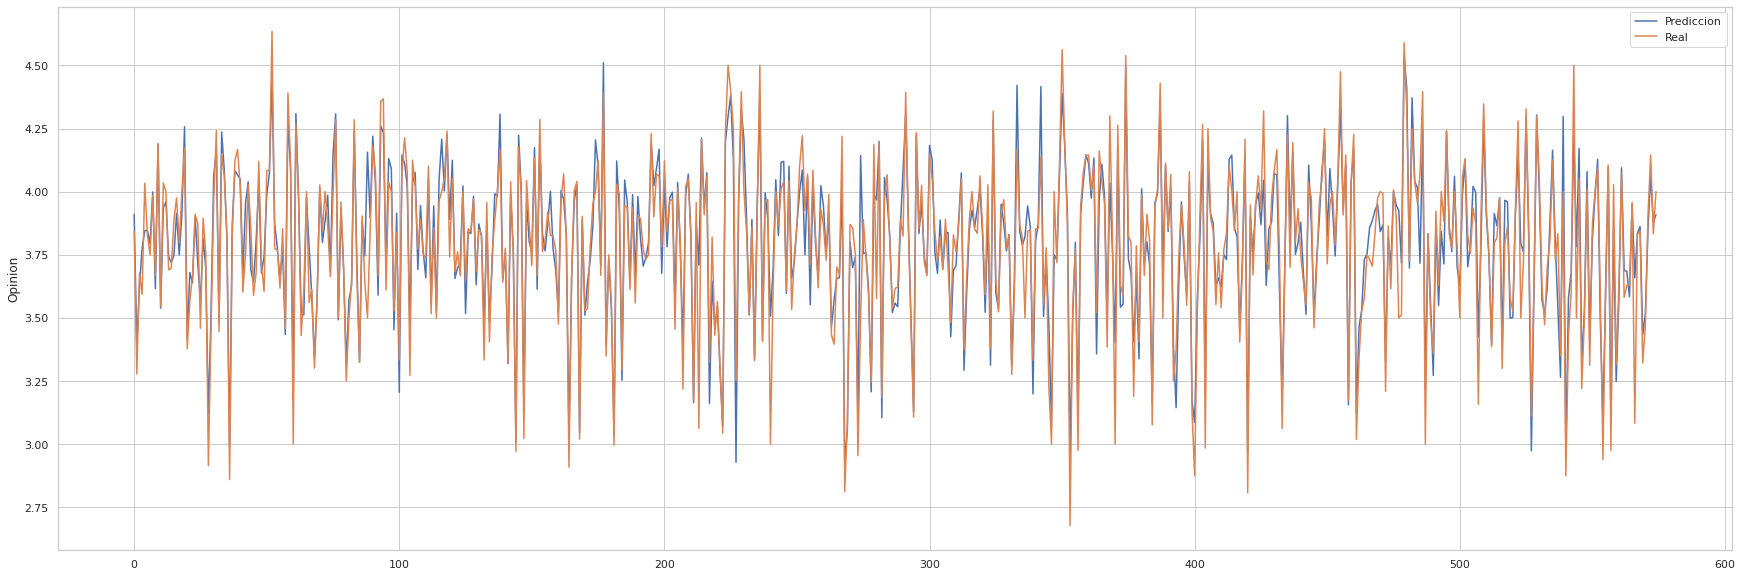

In [ ]:
plt.figure(figsize = (30,10))

plt.plot(y_pred, label='Prediccion')
plt.plot(y_test.values, label='Real')

plt.ylabel('Opinion')
plt.legend()
plt.show()


Se puede ver unas predicciones casi calcadas de las reales, aunque se ven distorsiones. 

In [ ]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test,y_pred)
print('R-Squared:',(r2))

Mean Absolute Error (MAE): 0.08035213078539453
Mean Squared Error (MSE): 0.0133468620398445
Root Mean Squared Error (RMSE): 0.1155286200032031
R-Squared: 0.8808825034607637


El error absoluto medio (MAE) resulta ser 0.07726071129161521. Esto nos dice que la diferencia promedio entre el valor real de los datos y el valor predicho por el modelo es 0.07726071129161521. Muy buen indicador.

La diferencia entre el estimador y lo que se estima es de 0.012240099017088737.
Muy buen indicador




La diferencia entre los valores, con la magnitud de estas diferencias es de 0.11063498098290946

El modelo tiene un R^2 de 0.88, significa que el 88% de las opiniones se puede explicar por 
'ABV','Alcohol','Sweet','Spices','Astringency','Sour','Salty','Hoppy','Body','Fruits','IBUProm','Malty','review_aroma','review_palate','review_appearance','review_taste'
 mientras que el 11% restante se debe a otros factores que no se han considerado en el modelo.

# **Modelo y analisis LinearSVR** Sin outliers

In [ ]:
X = df3.drop(columns = ["review_overall"])     # feature matrix
y = df3['review_overall']                      # target feature

In [ ]:
from sklearn.svm import LinearSVR
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf = LinearSVR(random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test,y_pred)
print('R-Squared:',(r2))

Mean Absolute Error (MAE): 0.13799857034052082
Mean Squared Error (MSE): 0.03331096285632383
Root Mean Squared Error (RMSE): 0.18251291147840426
R-Squared: 0.7027077607522034


Aunque se intento usar el modelo de Linear SVR para obtener mejores resultados que en la regresion lineal simple con outliers, se fracaso, se continua con el modelo de regresion lineal simple.

# **Pequeño analisis con API de cervezas y sus ingredientes**

In [ ]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import missingno as msno
import requests
import json
import pandas as pd
url='https://api.punkapi.com/v2/beers'
df11= requests.get(url)
print(df11)

<Response [200]>


In [ ]:
print(len(df11.text))
df11.text

46875


'[{"id":1,"name":"Buzz","tagline":"A Real Bitter Experience.","first_brewed":"09/2007","description":"A light, crisp and bitter IPA brewed with English and American hops. A small batch brewed only once.","image_url":"https://images.punkapi.com/v2/keg.png","abv":4.5,"ibu":60,"target_fg":1010,"target_og":1044,"ebc":20,"srm":10,"ph":4.4,"attenuation_level":75,"volume":{"value":20,"unit":"litres"},"boil_volume":{"value":25,"unit":"litres"},"method":{"mash_temp":[{"temp":{"value":64,"unit":"celsius"},"duration":75}],"fermentation":{"temp":{"value":19,"unit":"celsius"}},"twist":null},"ingredients":{"malt":[{"name":"Maris Otter Extra Pale","amount":{"value":3.3,"unit":"kilograms"}},{"name":"Caramalt","amount":{"value":0.2,"unit":"kilograms"}},{"name":"Munich","amount":{"value":0.4,"unit":"kilograms"}}],"hops":[{"name":"Fuggles","amount":{"value":25,"unit":"grams"},"add":"start","attribute":"bitter"},{"name":"First Gold","amount":{"value":25,"unit":"grams"},"add":"start","attribute":"bitter"},

In [ ]:
texto=df11.text
json.loads(texto)

[{'id': 1,
  'name': 'Buzz',
  'tagline': 'A Real Bitter Experience.',
  'first_brewed': '09/2007',
  'description': 'A light, crisp and bitter IPA brewed with English and American hops. A small batch brewed only once.',
  'image_url': 'https://images.punkapi.com/v2/keg.png',
  'abv': 4.5,
  'ibu': 60,
  'target_fg': 1010,
  'target_og': 1044,
  'ebc': 20,
  'srm': 10,
  'ph': 4.4,
  'attenuation_level': 75,
  'volume': {'value': 20, 'unit': 'litres'},
  'boil_volume': {'value': 25, 'unit': 'litres'},
  'method': {'mash_temp': [{'temp': {'value': 64, 'unit': 'celsius'},
     'duration': 75}],
   'fermentation': {'temp': {'value': 19, 'unit': 'celsius'}},
   'twist': None},
  'ingredients': {'malt': [{'name': 'Maris Otter Extra Pale',
     'amount': {'value': 3.3, 'unit': 'kilograms'}},
    {'name': 'Caramalt', 'amount': {'value': 0.2, 'unit': 'kilograms'}},
    {'name': 'Munich', 'amount': {'value': 0.4, 'unit': 'kilograms'}}],
   'hops': [{'name': 'Fuggles',
     'amount': {'value': 2

In [ ]:
jsondata=json.loads(texto)
df21=pd.DataFrame.from_dict(jsondata)
df21.head()

,id,name,tagline,first_brewed,description,image_url,abv,ibu,target_fg,target_og,ebc,srm,ph,attenuation_level,volume,boil_volume,method,ingredients,food_pairing,brewers_tips,contributed_by
0,1,Buzz,A Real Bitter Experience.,09/2007,"A light, crisp and bitter IPA brewed with Engl...",https://images.punkapi.com/v2/keg.png,4.5,60.0,1010,1044.0,20.0,10.0,4.4,75.0,"{'value': 20, 'unit': 'litres'}","{'value': 25, 'unit': 'litres'}","{'mash_temp': [{'temp': {'value': 64, 'unit': ...","{'malt': [{'name': 'Maris Otter Extra Pale', '...","[Spicy chicken tikka masala, Grilled chicken q...",The earthy and floral aromas from the hops can...,Sam Mason <samjbmason>
1,2,Trashy Blonde,You Know You Shouldn't,04/2008,"A titillating, neurotic, peroxide punk of a Pa...",https://images.punkapi.com/v2/2.png,4.1,41.5,1010,1041.7,15.0,15.0,4.4,76.0,"{'value': 20, 'unit': 'litres'}","{'value': 25, 'unit': 'litres'}","{'mash_temp': [{'temp': {'value': 69, 'unit': ...","{'malt': [{'name': 'Maris Otter Extra Pale', '...","[Fresh crab with lemon, Garlic butter dipping ...",Be careful not to collect too much wort from t...,Sam Mason <samjbmason>
2,3,Berliner Weisse With Yuzu - B-Sides,Japanese Citrus Berliner Weisse.,11/2015,Japanese citrus fruit intensifies the sour nat...,https://images.punkapi.com/v2/keg.png,4.2,8.0,1007,1040.0,8.0,4.0,3.2,83.0,"{'value': 20, 'unit': 'litres'}","{'value': 25, 'unit': 'litres'}","{'mash_temp': [{'temp': {'value': 60, 'unit': ...","{'malt': [{'name': 'Propino Pale Malt', 'amoun...","[Smoked chicken wings, Miso ramen, Yuzu cheese...",Clean everything twice. All you want is the cl...,Sam Mason <samjbmason>
3,4,Pilsen Lager,Unleash the Yeast Series.,09/2013,Our Unleash the Yeast series was an epic exper...,https://images.punkapi.com/v2/4.png,6.3,55.0,1012,1060.0,30.0,15.0,4.4,80.0,"{'value': 20, 'unit': 'litres'}","{'value': 25, 'unit': 'litres'}","{'mash_temp': [{'temp': {'value': 65, 'unit': ...","{'malt': [{'name': 'Extra Pale', 'amount': {'v...","[Spicy crab cakes, Spicy cucumber and carrot T...",Play around with the fermentation temperature ...,Ali Skinner <AliSkinner>
4,5,Avery Brown Dredge,Bloggers' Imperial Pilsner.,02/2011,An Imperial Pilsner in collaboration with beer...,https://images.punkapi.com/v2/5.png,7.2,59.0,1027,1069.0,10.0,5.0,4.4,67.0,"{'value': 20, 'unit': 'litres'}","{'value': 25, 'unit': 'litres'}","{'mash_temp': [{'temp': {'value': 66, 'unit': ...","{'malt': [{'name': 'Lager Malt', 'amount': {'v...","[Vietnamese squid salad, Chargrilled corn on t...",Make sure you have a big enough yeast starter ...,Sam Mason <samjbmason>


In [ ]:
df21.isnull().sum()

id                   0
name                 0
tagline              0
first_brewed         0
description          0
image_url            0
abv                  0
ibu                  1
target_fg            0
target_og            0
ebc                  2
srm                  2
ph                   1
attenuation_level    0
volume               0
boil_volume          0
method               0
ingredients          0
food_pairing         0
brewers_tips         0
contributed_by       0
dtype: int64

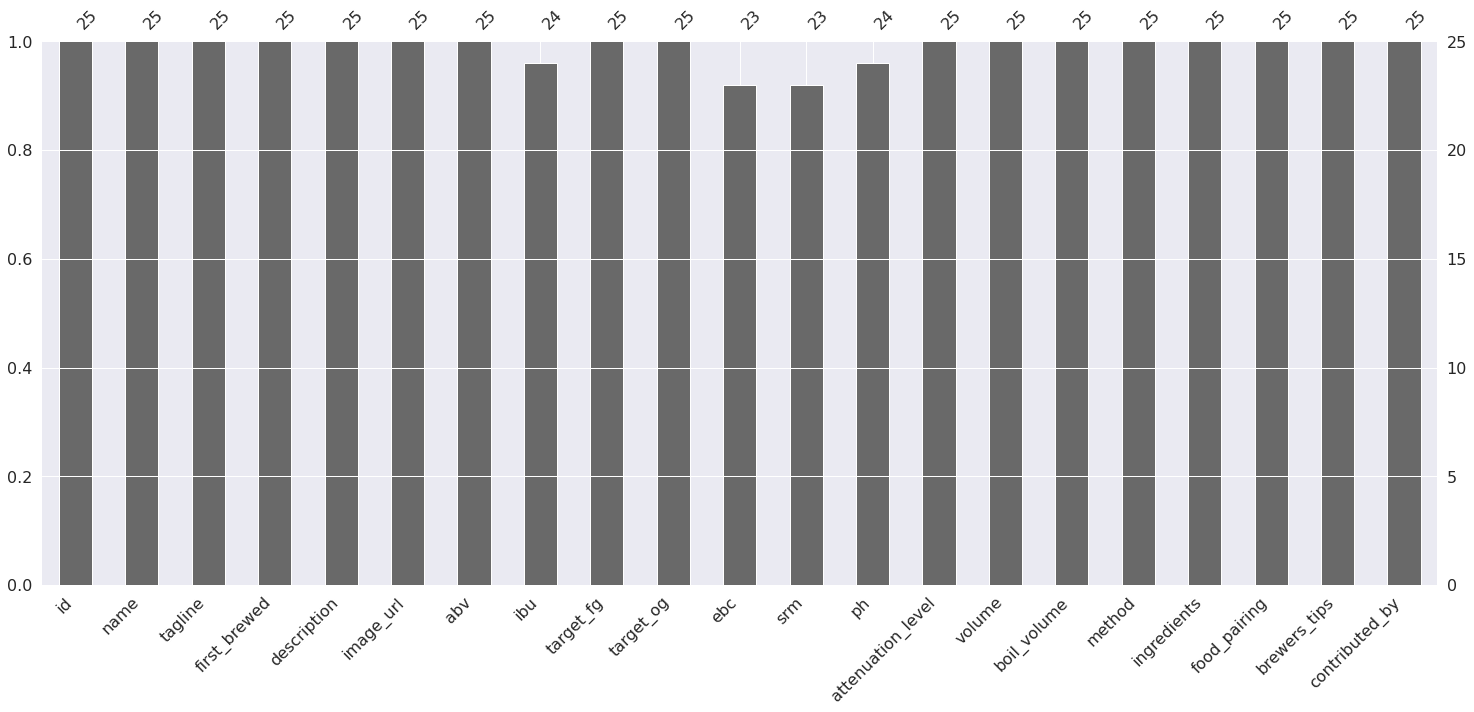

In [ ]:
msno.bar(df21)

In [ ]:
df21['volume_litres'] = df21['volume'].transform(lambda x:x['value'])

In [ ]:
df21['boil_volume_litres'] = df21['boil_volume'].transform(lambda x:x['value'])

In [ ]:
df21['fermentation_temp_celsius'] = df21['method'].transform(lambda x:x['fermentation'])
df21['fermentation_temp_celsius'] = df21['fermentation_temp_celsius'].transform(lambda x:x['temp'])
df21['fermentation_temp_celsius'] = df21['fermentation_temp_celsius'].transform(lambda x:x['value'])

In [ ]:
df21.info()
df21.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         25 non-null     int64  
 1   name                       25 non-null     object 
 2   tagline                    25 non-null     object 
 3   first_brewed               25 non-null     object 
 4   description                25 non-null     object 
 5   image_url                  25 non-null     object 
 6   abv                        25 non-null     float64
 7   ibu                        24 non-null     float64
 8   target_fg                  25 non-null     int64  
 9   target_og                  25 non-null     float64
 10  ebc                        23 non-null     float64
 11  srm                        23 non-null     float64
 12  ph                         24 non-null     float64
 13  attenuation_level          25 non-null     float64
 

(25, 24)

In [ ]:
df11=df21[['name','abv','ibu','ebc','srm','ph','target_fg','target_og','attenuation_level','volume_litres','boil_volume_litres','fermentation_temp_celsius']]
df11.head(25)

,name,abv,ibu,ebc,srm,ph,target_fg,target_og,attenuation_level,volume_litres,boil_volume_litres,fermentation_temp_celsius
0,Buzz,4.50,60.0,20.0,10.0,4.4,1010,1044.0,75.0,20,25,19
1,Trashy Blonde,4.10,41.5,15.0,15.0,4.4,1010,1041.7,76.0,20,25,18
2,Berliner Weisse With Yuzu - B-Sides,4.20,8.0,8.0,4.0,3.2,1007,1040.0,83.0,20,25,21
3,Pilsen Lager,6.30,55.0,30.0,15.0,4.4,1012,1060.0,80.0,20,25,9
4,Avery Brown Dredge,7.20,59.0,10.0,5.0,4.4,1027,1069.0,67.0,20,25,10
5,Electric India,5.20,38.0,15.0,7.5,4.4,1005,1045.0,88.9,20,25,22
6,AB:12,11.20,35.0,80.0,40.0,5.3,1017,1108.0,84.0,20,25,21
7,Fake Lager,4.70,40.0,12.0,6.0,4.4,1010,1046.0,78.0,20,25,10
8,AB:07,12.50,30.0,84.0,42.0,5.6,1020,1106.0,83.0,20,25,11
9,Bramling X,7.50,75.0,22.0,11.0,4.4,1013,1068.0,80.9,20,25,19


In [ ]:
df11.duplicated().sum()

0

In [ ]:
# Calcular la media de cada columna
mean_ebc = df11['ebc'].mean()
mean_srm = df11['srm'].mean()
mean_ph = df11['ph'].mean()
mean_ibu = df11['ibu'].mean()

# Reemplazar los valores nulos con la media de cada columna
df11['ebc'].fillna(mean_ebc, inplace=True)
df11['srm'].fillna(mean_srm, inplace=True)
df11['ph'].fillna(mean_ph, inplace=True)
df11['ibu'].fillna(mean_ibu, inplace=True)

In [ ]:
df11.head(25)

,name,abv,ibu,ebc,srm,ph,target_fg,target_og,attenuation_level,volume_litres,boil_volume_litres,fermentation_temp_celsius
0,Buzz,4.50,60.0000,20.00000,10.000000,4.400000,1010,1044.0,75.0,20,25,19
1,Trashy Blonde,4.10,41.5000,15.00000,15.000000,4.400000,1010,1041.7,76.0,20,25,18
2,Berliner Weisse With Yuzu - B-Sides,4.20,8.0000,8.00000,4.000000,3.200000,1007,1040.0,83.0,20,25,21
3,Pilsen Lager,6.30,55.0000,30.00000,15.000000,4.400000,1012,1060.0,80.0,20,25,9
4,Avery Brown Dredge,7.20,59.0000,10.00000,5.000000,4.400000,1027,1069.0,67.0,20,25,10
5,Electric India,5.20,38.0000,15.00000,7.500000,4.400000,1005,1045.0,88.9,20,25,22
6,AB:12,11.20,35.0000,80.00000,40.000000,5.300000,1017,1108.0,84.0,20,25,21
7,Fake Lager,4.70,40.0000,12.00000,6.000000,4.400000,1010,1046.0,78.0,20,25,10
8,AB:07,12.50,30.0000,84.00000,42.000000,5.600000,1020,1106.0,83.0,20,25,11
9,Bramling X,7.50,75.0000,22.00000,11.000000,4.400000,1013,1068.0,80.9,20,25,19


In [ ]:
df11.isnull().sum()

name                         0
abv                          0
ibu                          0
ebc                          0
srm                          0
ph                           0
target_fg                    0
target_og                    0
attenuation_level            0
volume_litres                0
boil_volume_litres           0
fermentation_temp_celsius    0
dtype: int64

# **Pequeño analisis con API de cervezas y sus precios**

In [ ]:
url='https://api.sampleapis.com/beers/ale'
df31= requests.get(url)
print(df31)

<Response [200]>


In [ ]:
print(len(df31.text))
df31.text

36615


'[{"price":"$16.99","name":"Founders All Day IPA","rating":{"average":4.411243509154233,"reviews":453},"image":"https://www.totalwine.com/media/sys_master/twmmedia/h00/h94/11891416367134.png","id":1},{"price":"$13.99","name":"Blue Moon Belgian White Belgian-Style Wheat Ale","rating":{"average":4.775260833383482,"reviews":305},"image":"https://www.totalwine.com/media/sys_master/twmmedia/he8/h67/11931543830558.png","id":2},{"price":"$16.99","name":"Guinness Extra Stout","rating":{"average":3.9785961474594638,"reviews":119},"image":"https://www.totalwine.com/media/sys_master/twmmedia/h50/h90/11996630056990.png","id":3},{"price":"$8.99","name":"Guinness Extra Stout","rating":{"average":3.5135460961961718,"reviews":199},"image":"https://www.totalwine.com/media/sys_master/twmmedia/h35/he7/11996577726494.png","id":4},{"price":"$15.49","name":"Sierra Nevada Pale Ale","rating":{"average":3.141161723541611,"reviews":459},"image":"https://www.totalwine.com/media/sys_master/twmmedia/h0a/h17/115899

In [ ]:
texto3=df31.text
json.loads(texto3)

[{'price': '$16.99',
  'name': 'Founders All Day IPA',
  'rating': {'average': 4.411243509154233, 'reviews': 453},
  'image': 'https://www.totalwine.com/media/sys_master/twmmedia/h00/h94/11891416367134.png',
  'id': 1},
 {'price': '$13.99',
  'name': 'Blue Moon Belgian White Belgian-Style Wheat Ale',
  'rating': {'average': 4.775260833383482, 'reviews': 305},
  'image': 'https://www.totalwine.com/media/sys_master/twmmedia/he8/h67/11931543830558.png',
  'id': 2},
 {'price': '$16.99',
  'name': 'Guinness Extra Stout',
  'rating': {'average': 3.9785961474594638, 'reviews': 119},
  'image': 'https://www.totalwine.com/media/sys_master/twmmedia/h50/h90/11996630056990.png',
  'id': 3},
 {'price': '$8.99',
  'name': 'Guinness Extra Stout',
  'rating': {'average': 3.5135460961961718, 'reviews': 199},
  'image': 'https://www.totalwine.com/media/sys_master/twmmedia/h35/he7/11996577726494.png',
  'id': 4},
 {'price': '$15.49',
  'name': 'Sierra Nevada Pale Ale',
  'rating': {'average': 3.141161723

In [ ]:
jsondata1=json.loads(texto3)
df41=pd.DataFrame.from_dict(jsondata1)
df41.head()

,price,name,rating,image,id
0,$16.99,Founders All Day IPA,"{'average': 4.411243509154233, 'reviews': 453}",https://www.totalwine.com/media/sys_master/twm...,1
1,$13.99,Blue Moon Belgian White Belgian-Style Wheat Ale,"{'average': 4.775260833383482, 'reviews': 305}",https://www.totalwine.com/media/sys_master/twm...,2
2,$16.99,Guinness Extra Stout,"{'average': 3.9785961474594638, 'reviews': 119}",https://www.totalwine.com/media/sys_master/twm...,3
3,$8.99,Guinness Extra Stout,"{'average': 3.5135460961961718, 'reviews': 199}",https://www.totalwine.com/media/sys_master/twm...,4
4,$15.49,Sierra Nevada Pale Ale,"{'average': 3.141161723541611, 'reviews': 459}",https://www.totalwine.com/media/sys_master/twm...,6


In [ ]:
df41['rating_'] = df41['rating'].transform(lambda x:x['average'])
df41['reviews'] = df41['rating'].transform(lambda x:x['reviews'])

In [ ]:
df41["price"] = df41["price"].apply(lambda x: x.replace("$",""))

In [ ]:
df41.isnull().sum()

price      0
name       0
rating     0
image      0
id         0
rating_    0
reviews    0
dtype: int64

In [ ]:
df41.info()
df41.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    179 non-null    object 
 1   name     179 non-null    object 
 2   rating   179 non-null    object 
 3   image    179 non-null    object 
 4   id       179 non-null    int64  
 5   rating_  179 non-null    float64
 6   reviews  179 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 9.9+ KB


(179, 7)

In [ ]:
df41['price']=df41['price'].astype(float)

In [ ]:
df51=df41[['name','price','rating_','reviews']]
df51.head()

,name,price,rating_,reviews
0,Founders All Day IPA,16.99,4.411244,453
1,Blue Moon Belgian White Belgian-Style Wheat Ale,13.99,4.775261,305
2,Guinness Extra Stout,16.99,3.978596,119
3,Guinness Extra Stout,8.99,3.513546,199
4,Sierra Nevada Pale Ale,15.49,3.141162,459


In [ ]:
df51.duplicated().sum()

0

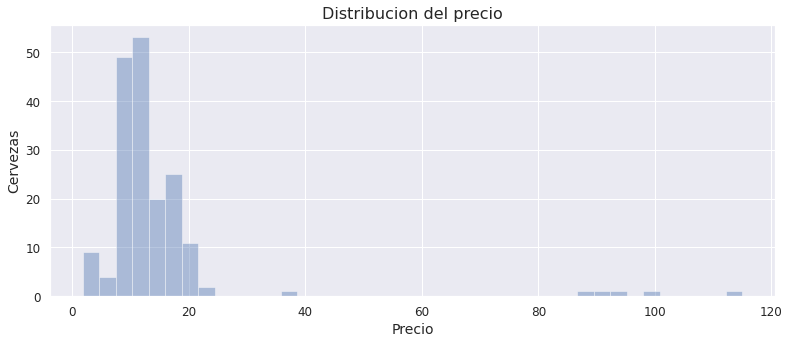

In [ ]:
#Distribucion con la forma esperada
plt.figure(figsize=(13,5))
x = df51['price']

sns.distplot(x, bins=40, kde=False)
plt.title('Distribucion del precio', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Cervezas', fontsize=14)
plt.yticks(fontsize=12)
plt.show();

Se ven valores muy extremos posibles outliners

In [ ]:
out=[]
def iqr_outliers(df51):
    q1 = df51.quantile(0.25)
    q3 = df51.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df51:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df51['price'])

Outliers: [89.99, 87.99, 36.99, 99.99, 92.99, 114.99]


Son valores muy extremos. Es muy inaudito un valor de mas de 35 dls por una cerveza. Se procede a no tener en cuenta esos outliners (eliminados)

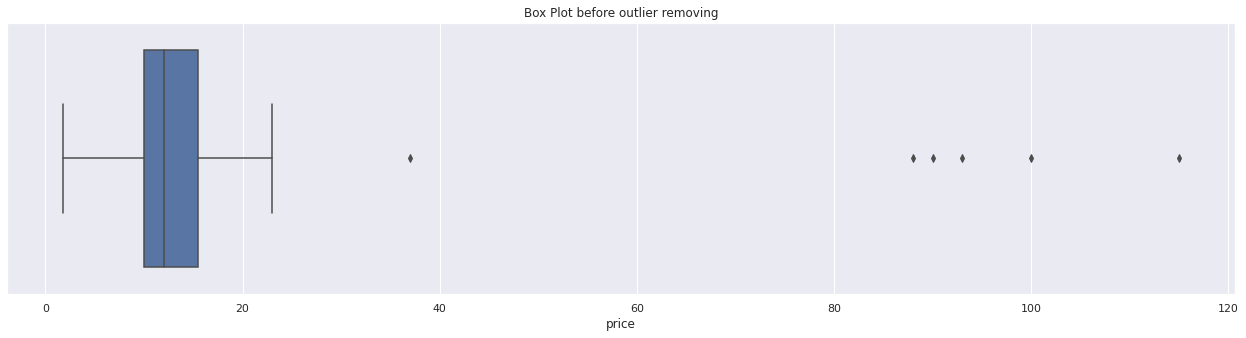

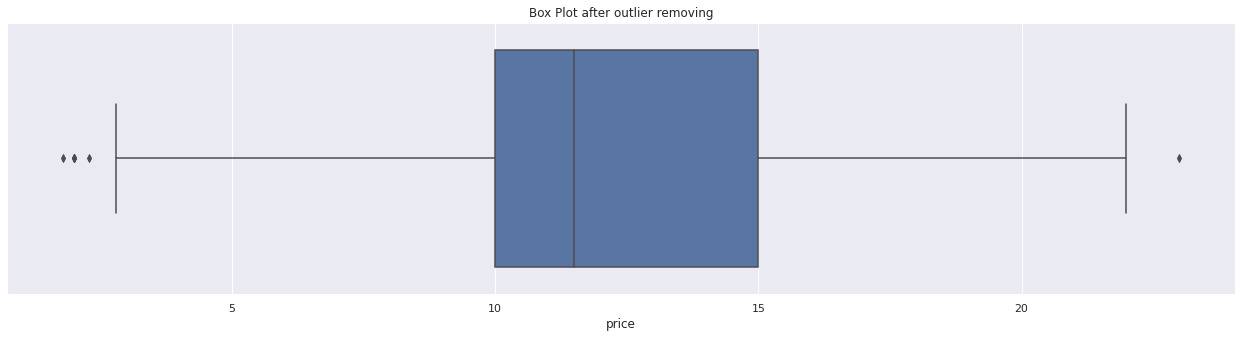

In [ ]:
plt.figure(figsize=(22,5))
sns.boxplot(df51['price'])
plt.title("Box Plot before outlier removing")
plt.show()
plt.figure(figsize=(22,5))
def drop_outliers(df51, field_name):
    iqr = 1.5 * (np.percentile(df51[field_name], 75) - np.percentile(df51[field_name], 25))
    df51.drop(df51[df51[field_name] > (iqr + np.percentile(df51[field_name], 75))].index, inplace=True)
    df51.drop(df51[df51[field_name] < (np.percentile(df51[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df51, 'price')
sns.boxplot(df51['price'])
plt.title("Box Plot after outlier removing")
plt.show()

In [ ]:
out=[]
def iqr_outliers(df51):
    q1 = df51.quantile(0.25)
    q3 = df51.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df51:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df51['price'])

Outliers: [2.29, 1.99, 22.99, 1.79, 1.99, 1.99]


Estos nuevos outliers no los noto muy llamatorios, se puede conseguir cervezas por esos precios en EEUU.

In [ ]:
mean_price = df51['price'].mean()
print(mean_price)

12.213121387283236


La mayoria de cervezas, por no decir todas, cuestan menos de 20 dls. En general un media de 14.70 dls, contando los outliners, pero como no es el caso el precio medio ronda los 12,20 dls